In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
from tqdm import tqdm
import seaborn as sns
import pandas as pd

from plotting_utils import get_bias_std_lines, get_theory_line, plot_lines, standard_2_plot, standard_2x2_plot

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "text.latex.preamble": r"\usepackage{amsmath}"})

sns.set_theme()
sns.set_context("poster")
sns.set_style("ticks")
sns.set_style("darkgrid", {"axes.facecolor": ".91",})
label_size = 55

In [3]:
api = wandb.Api()

# Figure 3

In [4]:
runs = api.runs(path='data-feedback', filters={'group': 'fig3-top'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/frac_imbalance_class_pred'])
    preds = np.array([row['test_stats/frac_imbalance_class_pred'] for row in hist]) * 100
    targ = run.summary['test_stats/frac_imbalance_class_targ'] * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'preds': preds, 'targ': targ, 'n0': n0, 'm': m, 'k': k})
    
bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 50000, 'targ')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=50000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 50000, 'targ')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=50000, human_samples_per_round=2500, model_samples_per_round=2500)

runs = api.runs(path='data-feedback', filters={'group': 'fig3-bottom'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/frac_imbalance_class_pred'])
    preds = np.array([row['test_stats/frac_imbalance_class_pred'] for row in hist]) * 100
    targ = run.summary['test_stats/frac_imbalance_class_targ'] * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'preds': preds, 'targ': targ, 'n0': n0, 'm': m, 'k': k})
    
bias_line_1v2, bias_std_1v2, baseline_1v2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 50000, 'targ')
theory_line_1v2 = get_theory_line(bias_line_1v2, baseline_1v2, initial_train_set_size=50000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2v2, bias_std_2v2, baseline_2v2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 50000, 'targ')
theory_line_2v2 = get_theory_line(bias_line_2v2, baseline_2v2, initial_train_set_size=50000, human_samples_per_round=2500, model_samples_per_round=2500)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]


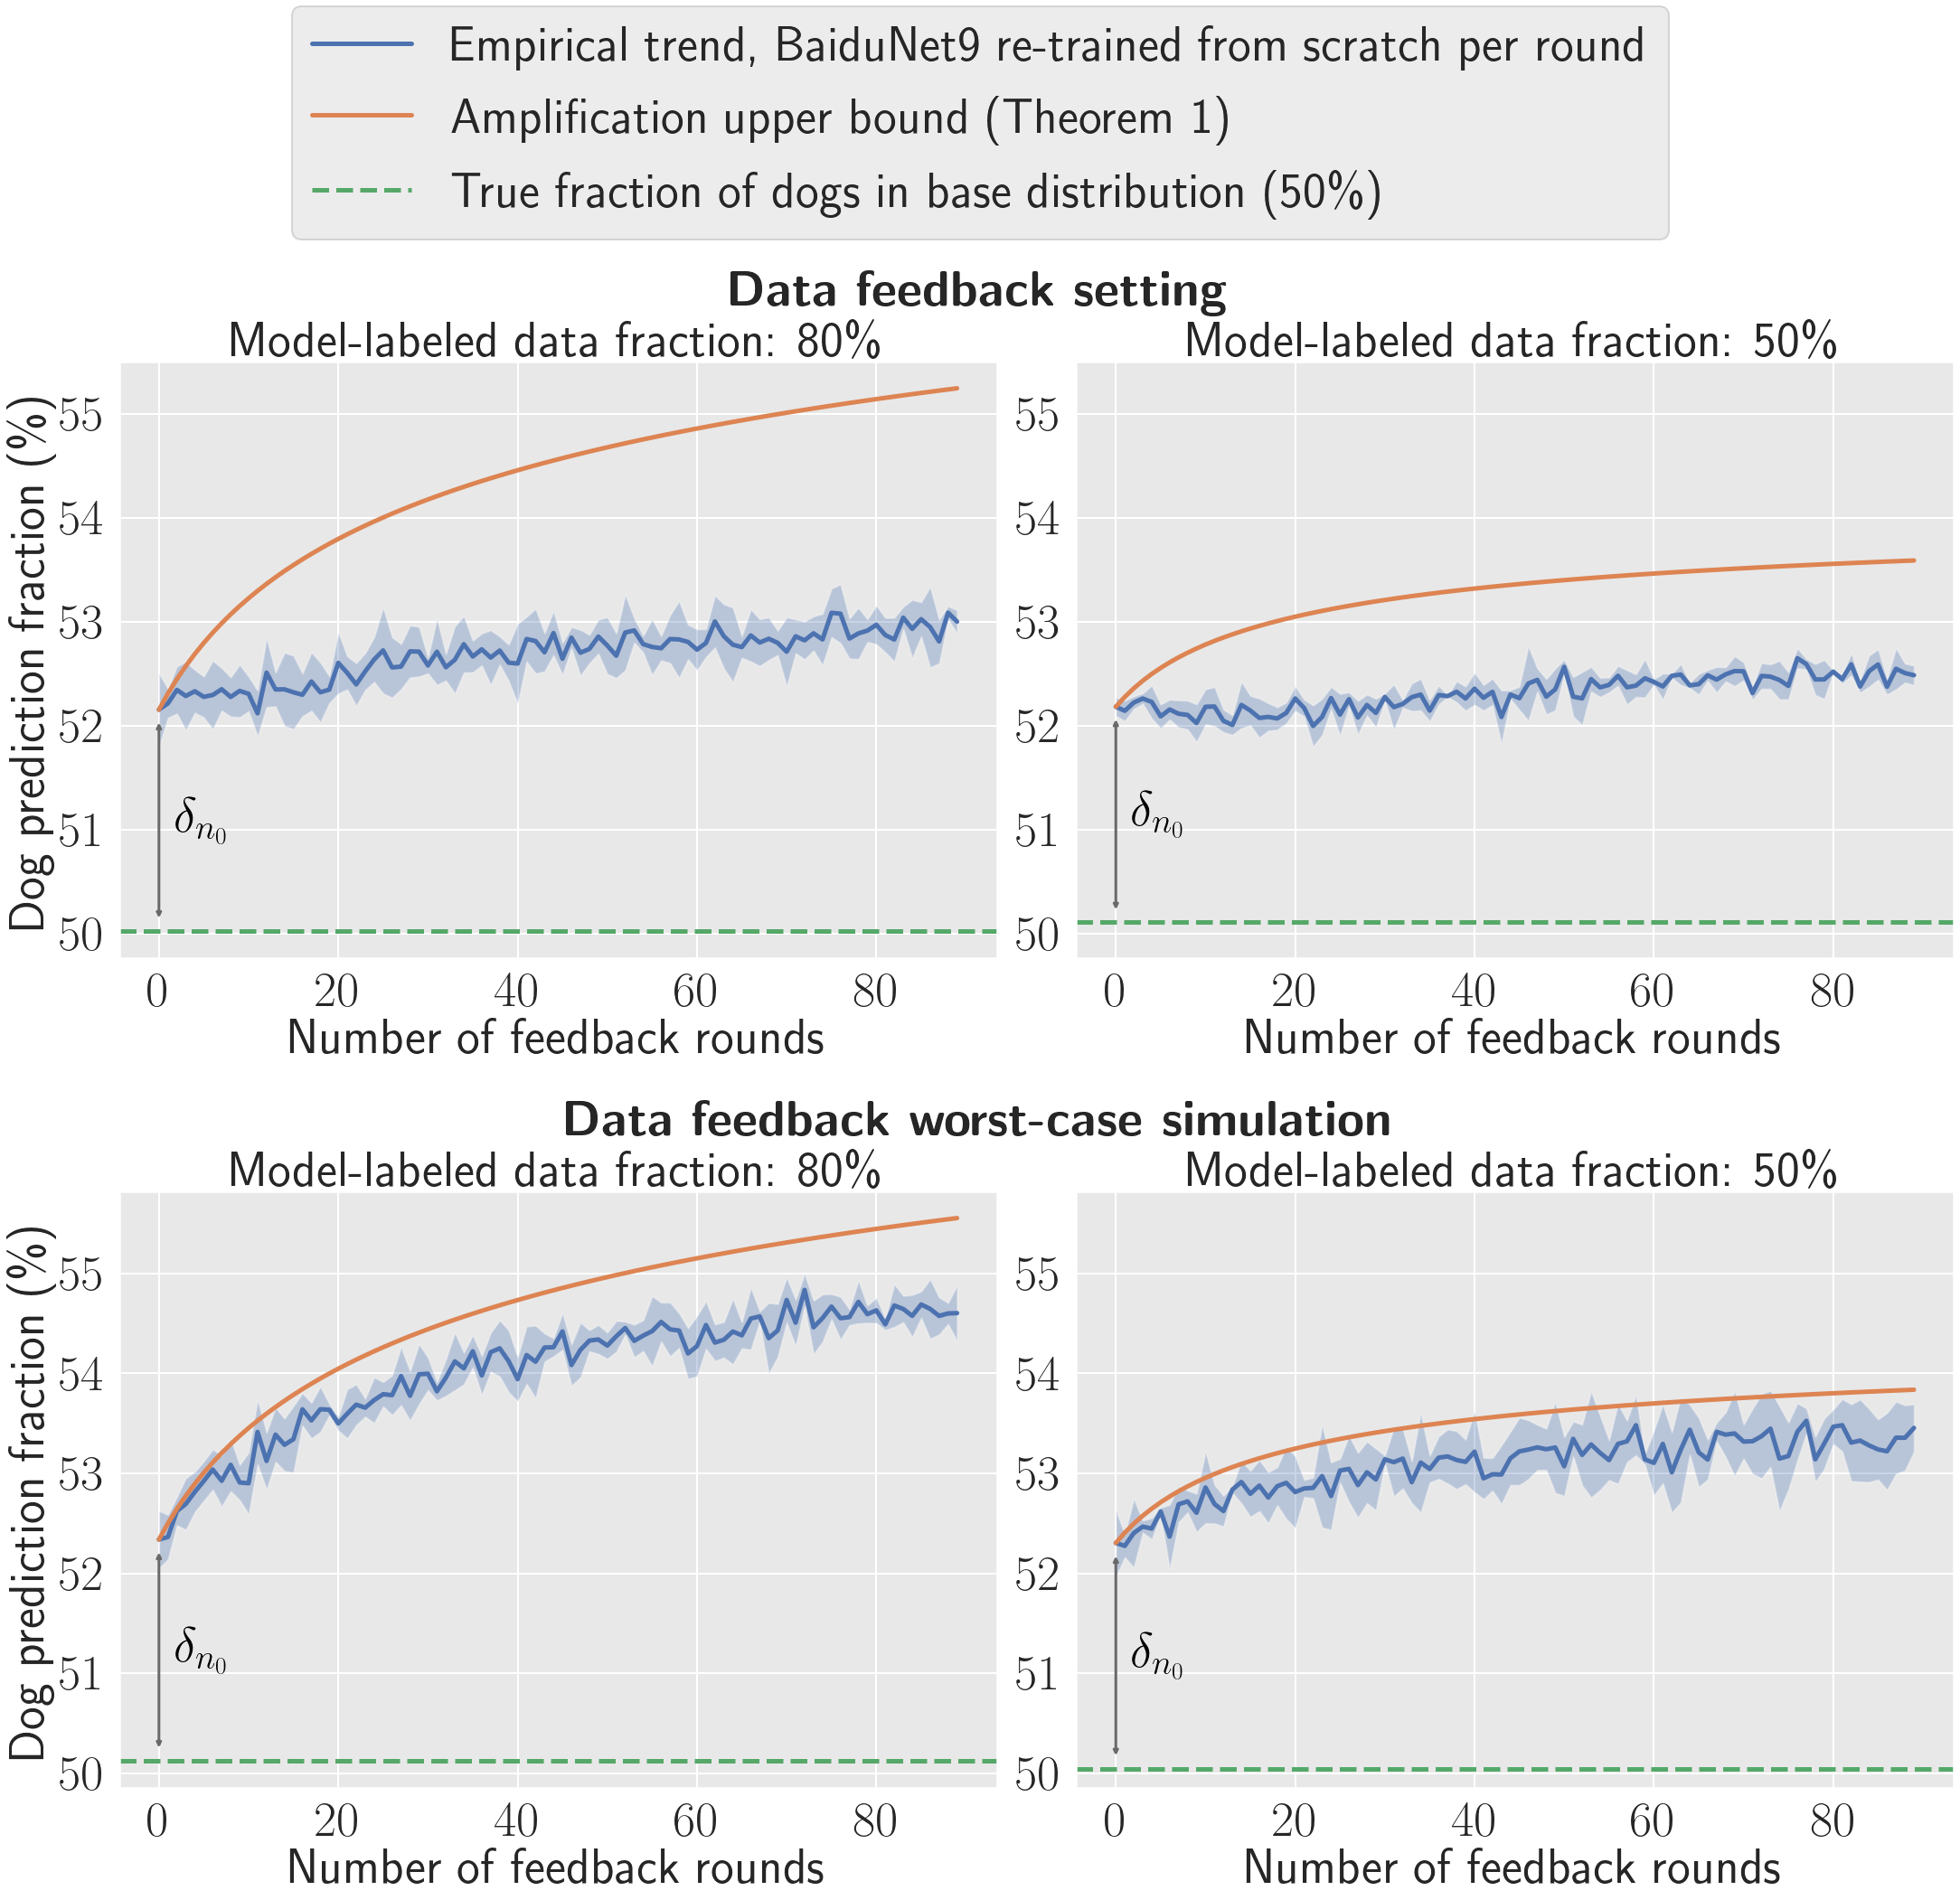

In [5]:
fig = plt.figure(figsize=(30, 25), constrained_layout=True)
fig1, fig2 = fig.subfigures(nrows=2, ncols=1, hspace=0.04)
fig1.suptitle(r'\textbf{Data feedback setting}', fontsize=label_size)
fig2.suptitle(r'\textbf{Data feedback worst-case simulation}', fontsize=label_size)
ax11, ax12 = fig1.subplots(1, 2, sharey='row')
ax21, ax22 = fig2.subplots(1, 2, sharey='row')

bias_label = 'Empirical trend, BaiduNet9 re-trained from scratch per round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True fraction of dogs in base distribution (50\%)'
xlabel = 'Number of feedback rounds'
ylabel = 'Dog prediction fraction (\%)'
left_title = 'Model-labeled data fraction: 80\%'
right_title = 'Model-labeled data fraction: 50\%'

plot_lines(ax11, bias_line_1, bias_std_1, theory_line_1, baseline_1, 
           bias_label, theory_label, baseline_label, 
           tick_params=True, xlabel=xlabel, ylabel=ylabel, title=left_title)

plot_lines(ax12, bias_line_2, bias_std_2, theory_line_2, baseline_2, 
           bias_label, theory_label, baseline_label, 
           tick_params=True, xlabel=xlabel, title=right_title)
ax12.yaxis.set_tick_params(labelbottom=True)

plot_lines(ax21, bias_line_1v2, bias_std_1v2, theory_line_1v2, baseline_1v2, 
           bias_label, theory_label, baseline_label, 
           tick_params=True, xlabel=xlabel, ylabel=ylabel, title=left_title)

plot_lines(ax22, bias_line_2v2, bias_std_2v2, theory_line_2v2, baseline_2v2, 
           bias_label, theory_label, baseline_label, 
           tick_params=True, xlabel=xlabel, title=right_title)
ax22.tick_params(axis='both', which='major', labelsize=label_size, labelleft=True)

handles, labels = ax11.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 1.09), prop={'size': label_size})
plt.savefig('figure_3.pdf', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
plt.show()

# Figure 9

In [6]:
runs = api.runs(path='data-feedback', filters={'group': 'fig9'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/frac_imbalance_class_pred'])
    preds = np.array([row['test_stats/frac_imbalance_class_pred'] for row in hist]) * 100
    targ = run.summary['test_stats/frac_imbalance_class_targ'] * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'preds': preds, 'targ': targ, 'n0': n0, 'm': m, 'k': k})
    
bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 50000, 'targ')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=50000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 50000, 'targ')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=50000, human_samples_per_round=2500, model_samples_per_round=2500)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.20it/s]


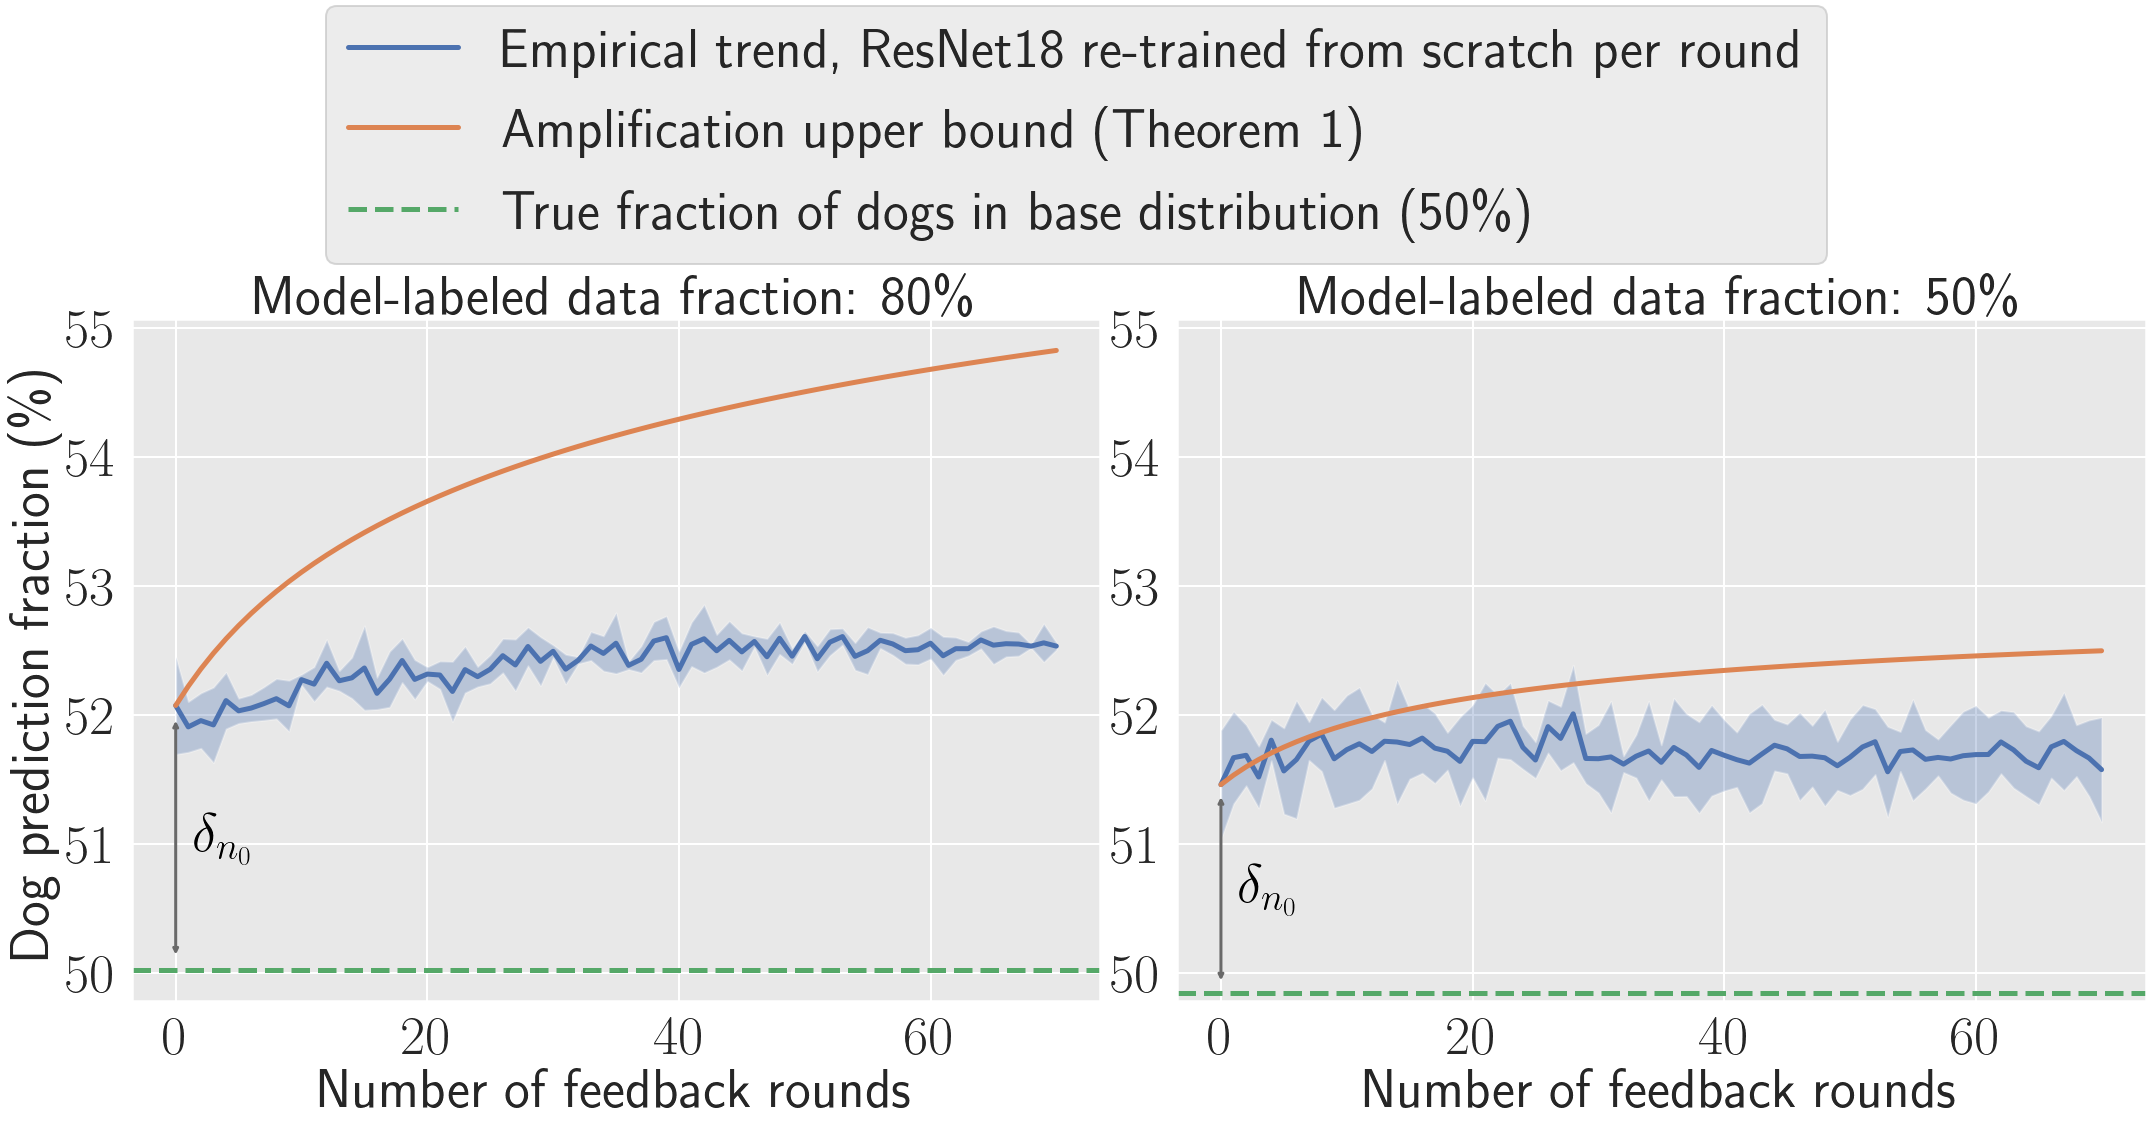

In [8]:
bias_label = 'Empirical trend, ResNet18 re-trained from scratch per round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True fraction of dogs in base distribution (50\%)'
xlabel = 'Number of feedback rounds'
ylabel = 'Dog prediction fraction (\%)'
left_title = 'Model-labeled data fraction: 80\%'
right_title = 'Model-labeled data fraction: 50\%'

standard_2_plot('figure_9.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2, 
                bias_label, theory_label, baseline_label, xlabel, ylabel, left_title, right_title)

# Figure 11

In [9]:
runs = api.runs(path='data-feedback', filters={'group': 'fig11'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/frac_imbalance_class_pred'])
    preds = np.array([row['test_stats/frac_imbalance_class_pred'] for row in hist]) * 100
    targ = run.summary['test_stats/frac_imbalance_class_targ'] * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'preds': preds, 'targ': targ, 'n0': n0, 'm': m, 'k': k})
    
bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 50000, 'targ')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=50000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 50000, 'targ')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=50000, human_samples_per_round=2500, model_samples_per_round=2500)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.46it/s]


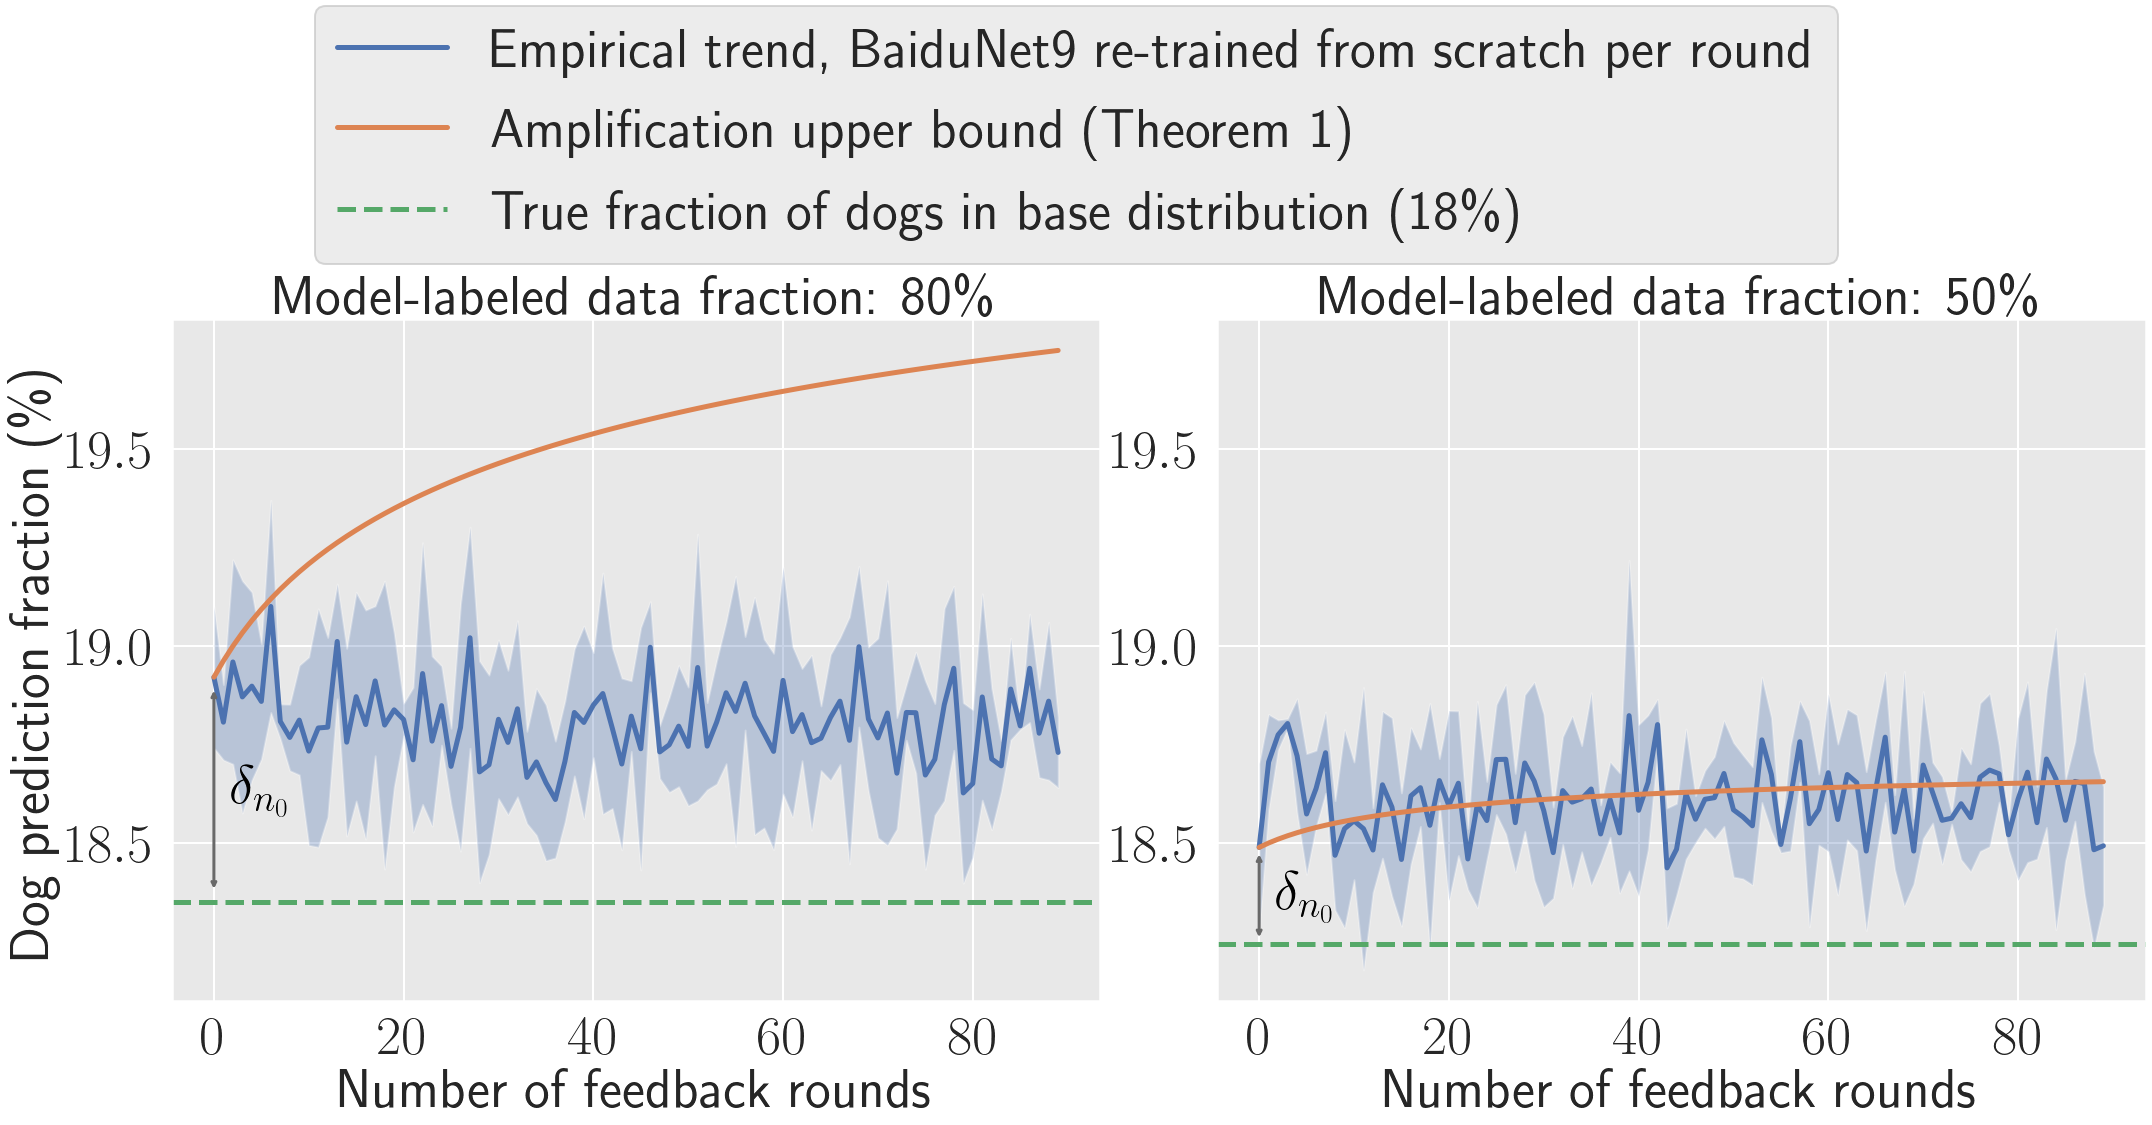

In [10]:
bias_label = 'Empirical trend, BaiduNet9 re-trained from scratch per round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True fraction of dogs in base distribution (18\%)'
xlabel = 'Number of feedback rounds'
ylabel = 'Dog prediction fraction (\%)'
left_title = 'Model-labeled data fraction: 80\%'
right_title = 'Model-labeled data fraction: 50\%'

standard_2_plot('figure_11.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2, 
                bias_label, theory_label, baseline_label, xlabel, ylabel, left_title, right_title)

# Figure 12

In [11]:
runs = api.runs(path='data-feedback', filters={'group': 'fig12'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/frac_imbalance_class_pred'])
    preds = np.array([row['test_stats/frac_imbalance_class_pred'] for row in hist]) * 100
    targ = run.summary['test_stats/frac_imbalance_class_targ'] * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'preds': preds, 'targ': targ, 'n0': n0, 'm': m, 'k': k})
    
bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 50000, 'targ')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=50000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 50000, 'targ')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=50000, human_samples_per_round=2500, model_samples_per_round=2500)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.41it/s]


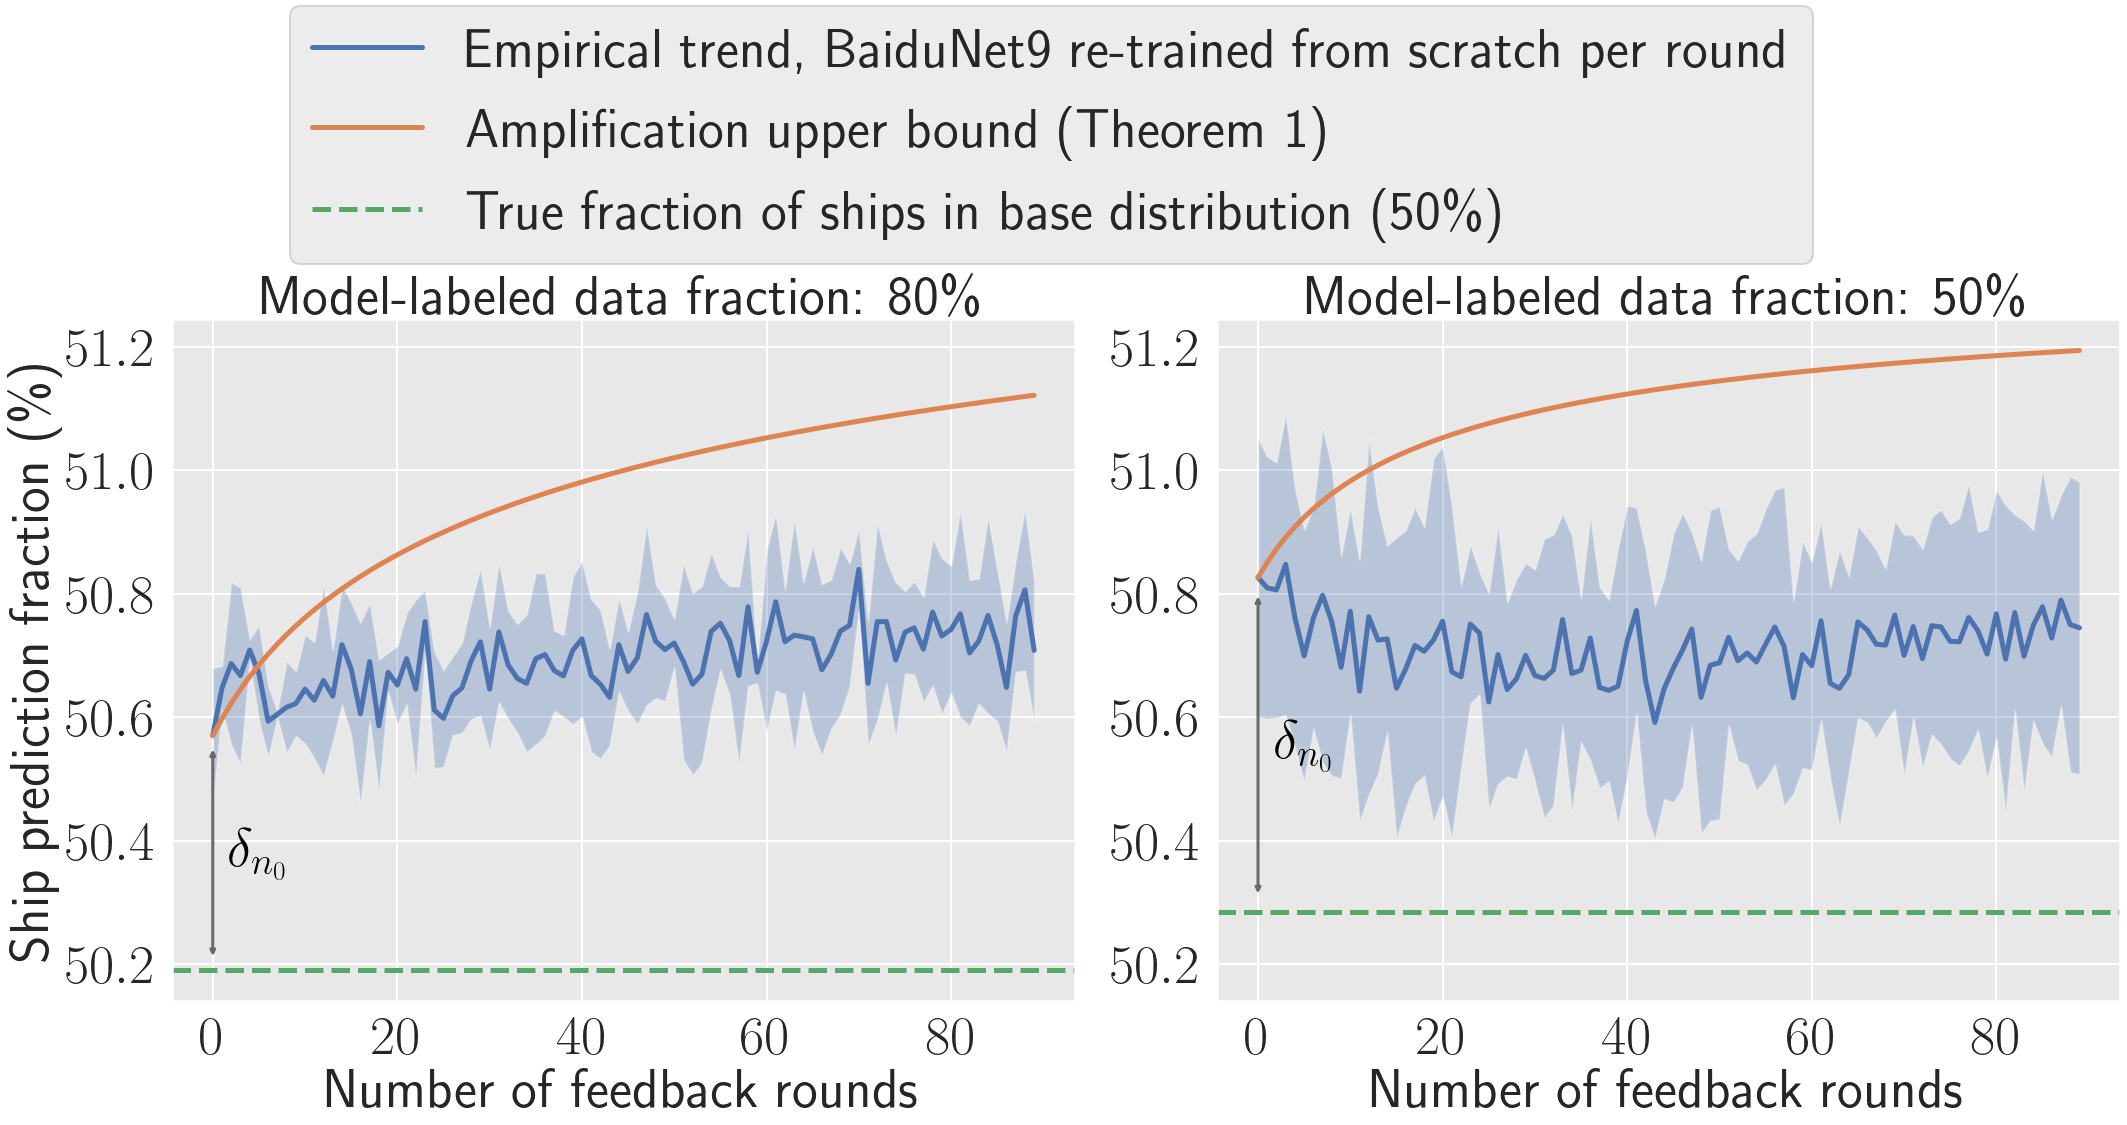

In [12]:
bias_label = 'Empirical trend, BaiduNet9 re-trained from scratch per round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True fraction of ships in base distribution (50\%)'
xlabel = 'Number of feedback rounds'
ylabel = 'Ship prediction fraction (\%)'
left_title = 'Model-labeled data fraction: 80\%'
right_title = 'Model-labeled data fraction: 50\%'

standard_2_plot('figure_12.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2, 
                bias_label, theory_label, baseline_label, xlabel, ylabel, left_title, right_title)

# Figure 13

In [13]:
runs = api.runs(path='data-feedback', filters={'group': 'fig13'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/frac_imbalance_class_pred'])
    preds = np.array([row['test_stats/frac_imbalance_class_pred'] for row in hist]) * 100
    targ = run.summary['test_stats/frac_imbalance_class_targ'] * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'preds': preds, 'targ': targ, 'n0': n0, 'm': m, 'k': k})
    
bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 50000, 'targ')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=50000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 50000, 'targ')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=50000, human_samples_per_round=2500, model_samples_per_round=2500)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.82it/s]


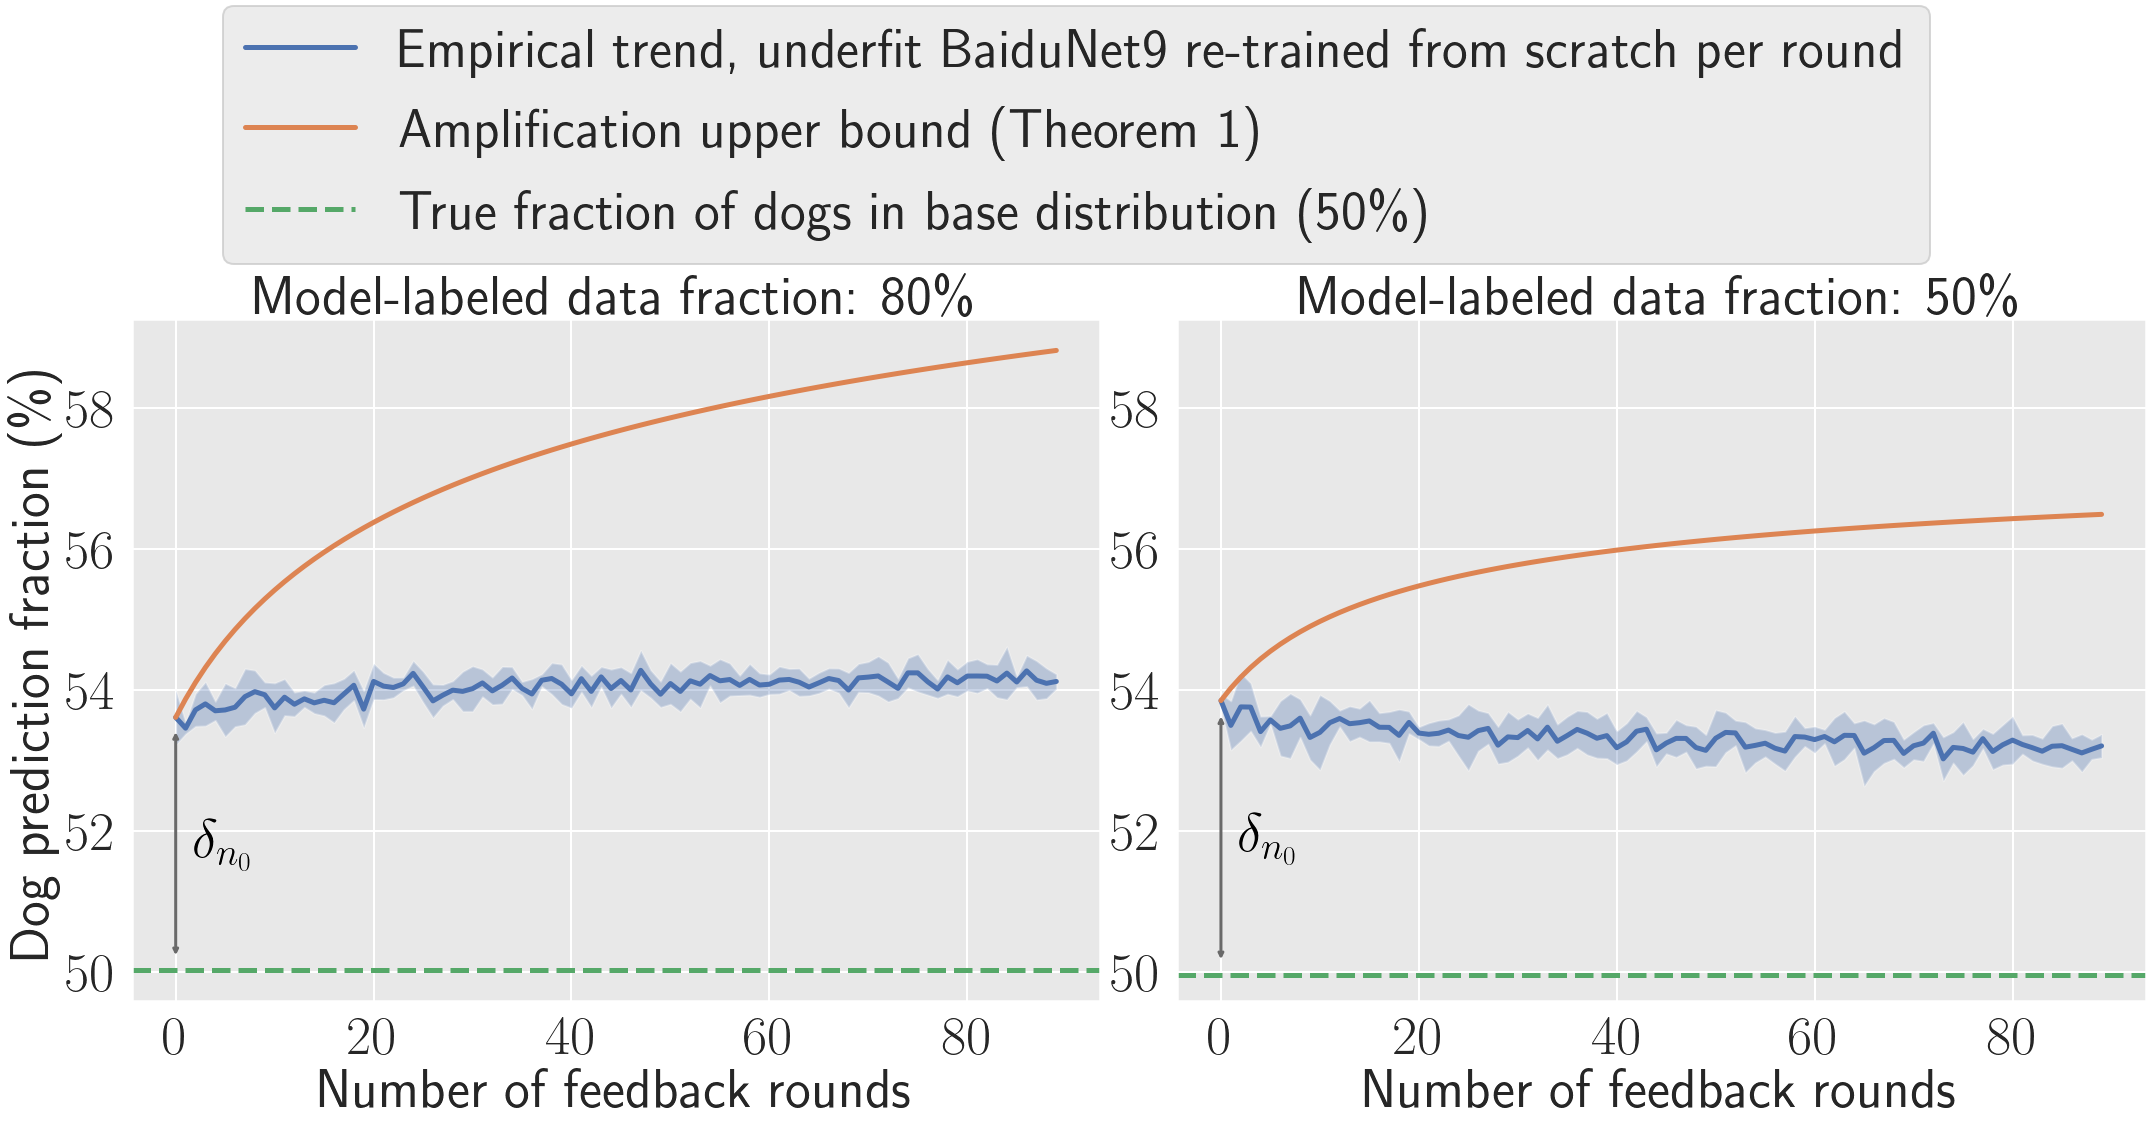

In [14]:
bias_label = 'Empirical trend, underfit BaiduNet9 re-trained from scratch per round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True fraction of dogs in base distribution (50\%)'
xlabel = 'Number of feedback rounds'
ylabel = 'Dog prediction fraction (\%)'
left_title = 'Model-labeled data fraction: 80\%'
right_title = 'Model-labeled data fraction: 50\%'

standard_2_plot('figure_13.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2, 
                bias_label, theory_label, baseline_label, xlabel, ylabel, left_title, right_title)

# Figure 14

In [16]:
runs = api.runs(path='data-feedback', filters={'group': 'fig14'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/frac_imbalance_class_pred'])
    preds = np.array([row['test_stats/frac_imbalance_class_pred'] for row in hist]) * 100
    targ = run.summary['test_stats/frac_imbalance_class_targ'] * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'preds': preds, 'targ': targ, 'n0': n0, 'm': m, 'k': k})
    
bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'targ')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 20000, 'targ')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=20000, human_samples_per_round=2500, model_samples_per_round=2500)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.69it/s]


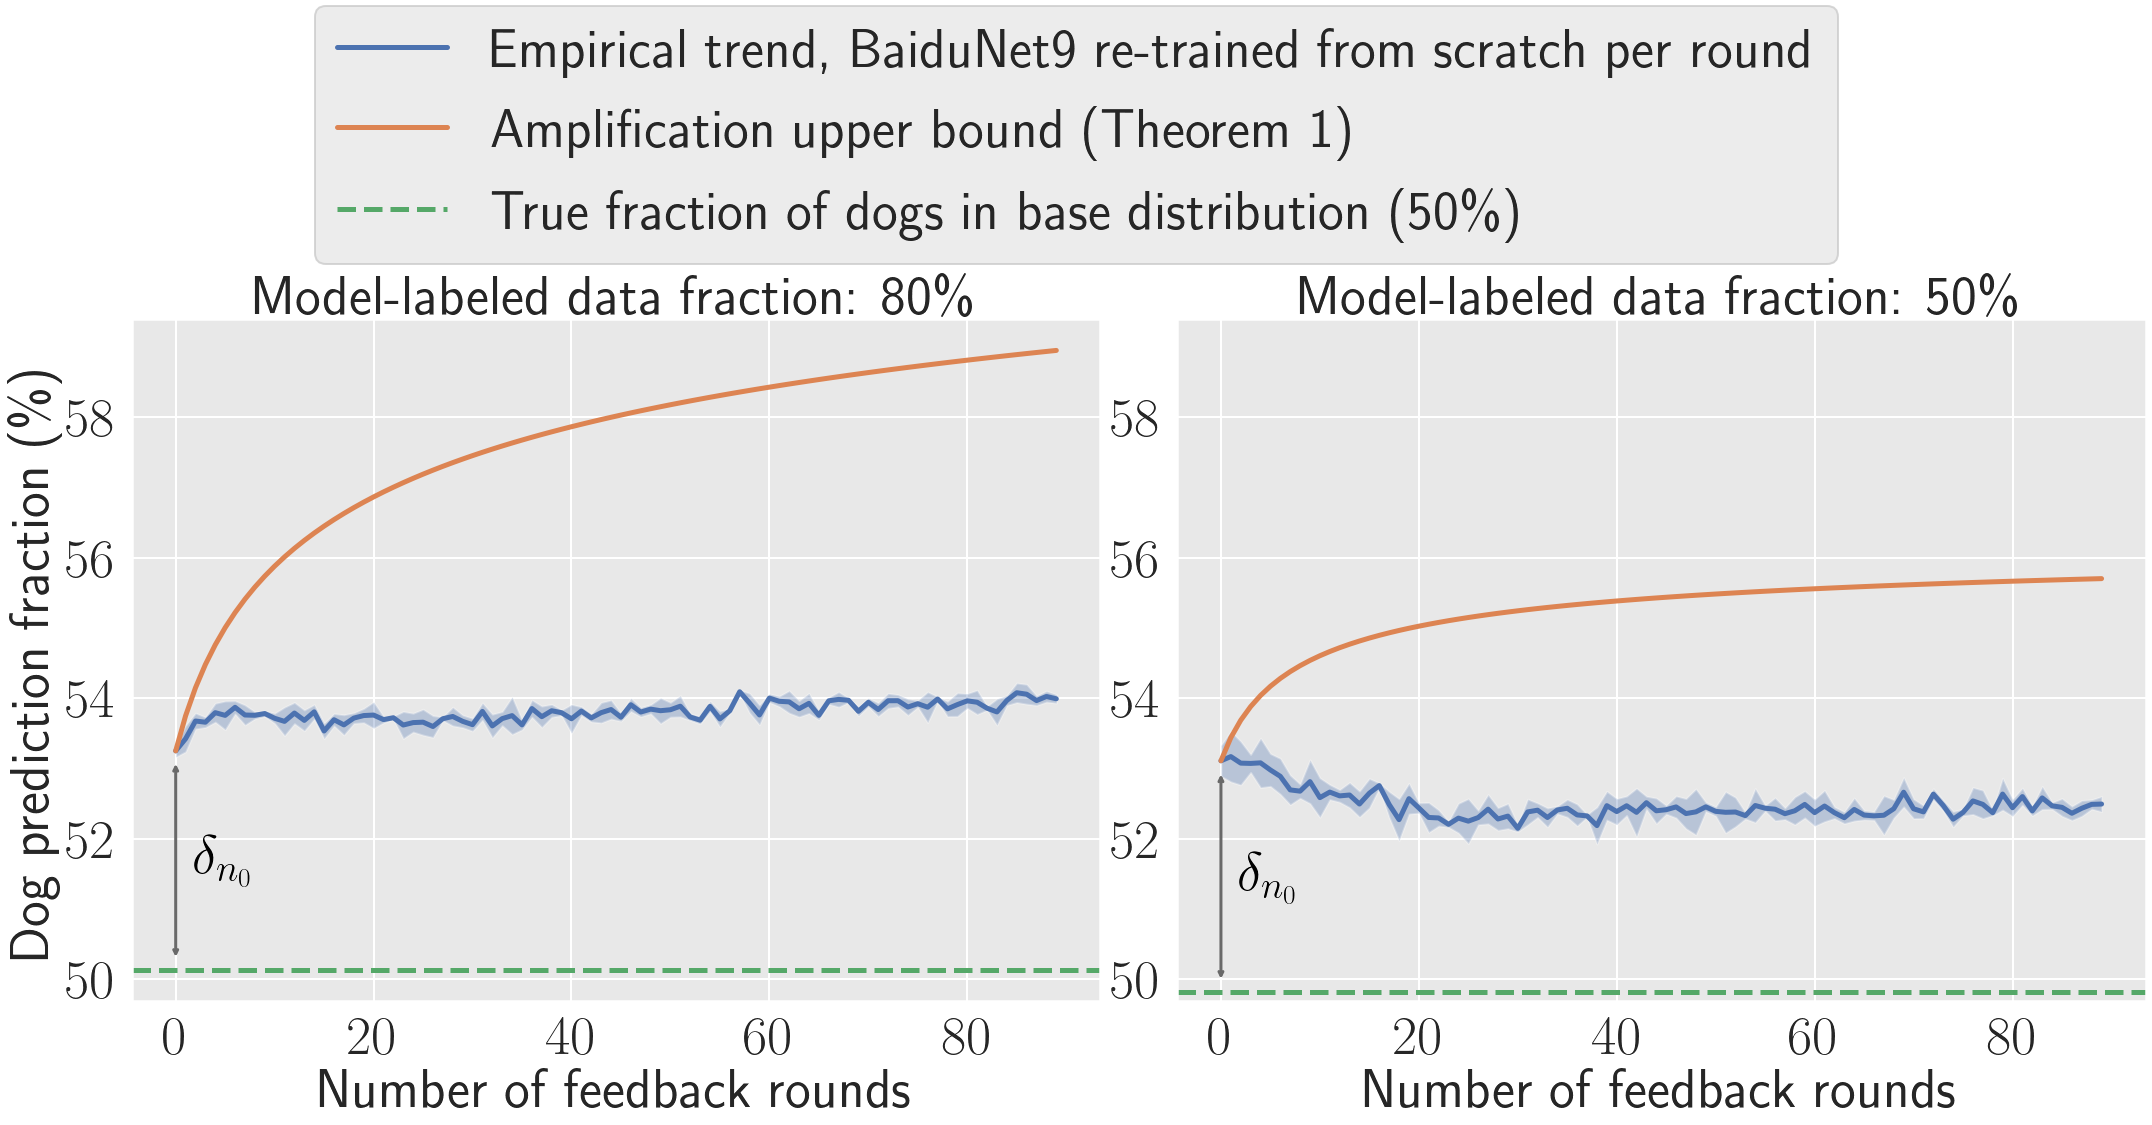

In [17]:
bias_label = 'Empirical trend, BaiduNet9 re-trained from scratch per round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True fraction of dogs in base distribution (50\%)'
xlabel = 'Number of feedback rounds'
ylabel = 'Dog prediction fraction (\%)'
left_title = 'Model-labeled data fraction: 80\%'
right_title = 'Model-labeled data fraction: 50\%'

standard_2_plot('figure_14.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2, 
                bias_label, theory_label, baseline_label, xlabel, ylabel, left_title, right_title)

# Figure 10

In [18]:
runs = api.runs(path='data-feedback', filters={'group': 'fig10'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/frac_imbalance_class_pred'])
    preds = np.array([row['test_stats/frac_imbalance_class_pred'] for row in hist]) * 100
    targ = run.summary['test_stats/frac_imbalance_class_targ'] * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'preds': preds, 'targ': targ, 'n0': n0, 'm': m, 'k': k})
    
bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'targ')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'preds', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 20000, 'targ')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=20000, human_samples_per_round=2500, model_samples_per_round=2500)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.68it/s]


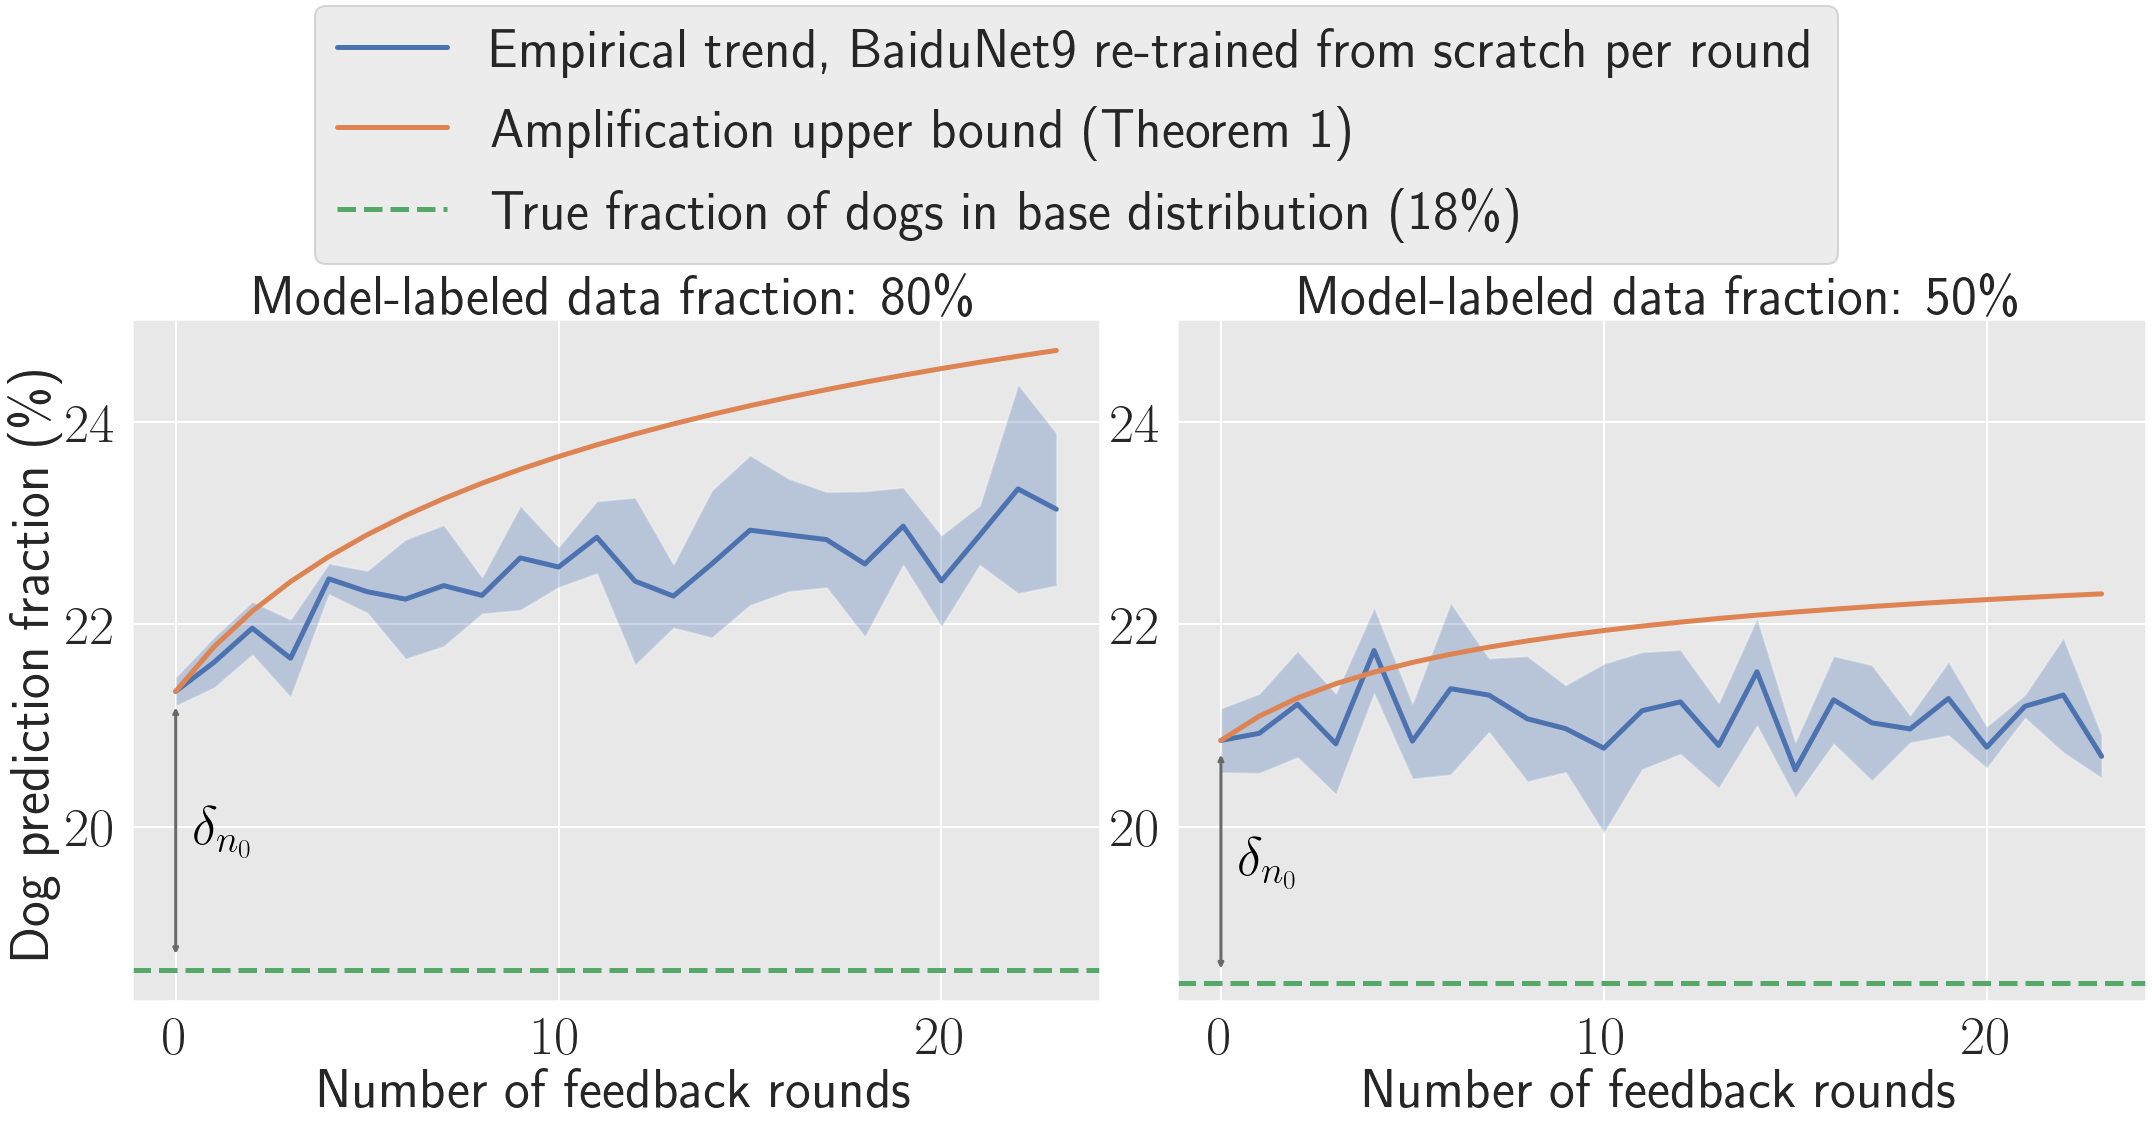

In [19]:
bias_label = 'Empirical trend, BaiduNet9 re-trained from scratch per round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True fraction of dogs in base distribution (18\%)'
xlabel = 'Number of feedback rounds'
ylabel = 'Dog prediction fraction (\%)'
left_title = 'Model-labeled data fraction: 80\%'
right_title = 'Model-labeled data fraction: 50\%'

standard_2_plot('figure_10.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2, 
                bias_label, theory_label, baseline_label, xlabel, ylabel, left_title, right_title)

# Figure 7

In [23]:
runs = api.runs(path='data-feedback', filters={'group': 'fig3-top'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['test_stats/accuracy'])
    accs = np.array([row['test_stats/accuracy'] for row in hist]) * 100
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'accs': accs, 'n0': n0, 'm': m, 'k': k})
    
accs_line_1, accs_std_1 = get_bias_std_lines(runs_stats, 'accs', lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 50000)
accs_line_2, accs_std_2 = get_bias_std_lines(runs_stats, 'accs', lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 50000)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.80it/s]


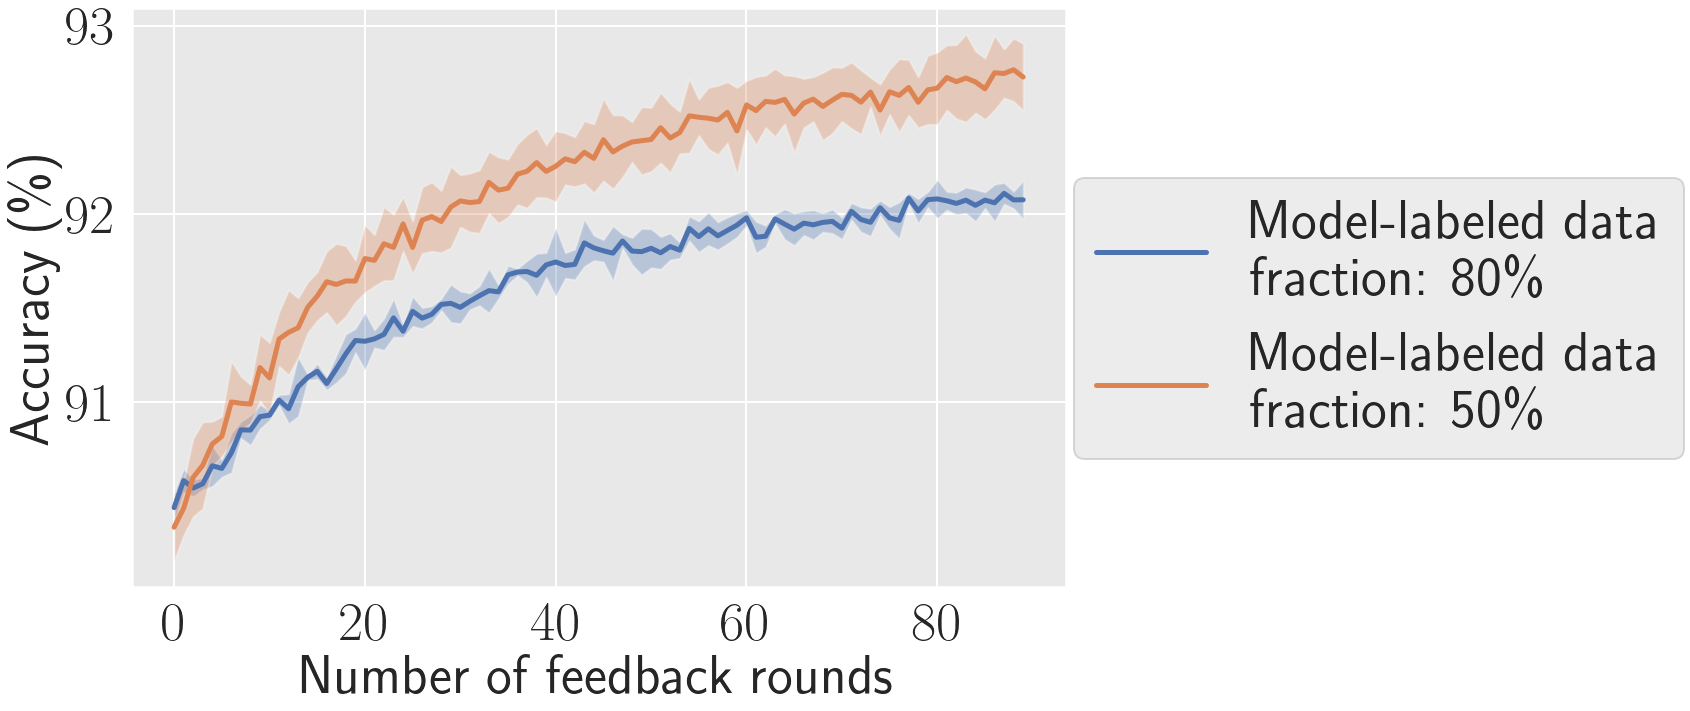

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(accs_line_1, label='Model-labeled data\nfraction: 80\%', linewidth=5)
ax.fill_between(range(len(accs_std_1)), accs_line_1-accs_std_1, accs_line_1+accs_std_1, alpha=0.3)
ax.plot(accs_line_2, label='Model-labeled data\nfraction: 50\%', linewidth=5)
ax.fill_between(range(len(accs_std_2)), accs_line_2-accs_std_2, accs_line_2+accs_std_2, alpha=0.3)

ax.set_xlabel('Number of feedback rounds', fontsize=label_size)
ax.set_ylabel('Accuracy (\%)', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=label_size)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(1.28, 0.55), prop={'size': label_size})
fig.tight_layout()
plt.savefig('figure_7.pdf', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
plt.show()

# Figures 4, 8, 15, 16, 17

In [47]:
runs = api.runs(path='data-feedback', filters={'group': 'fig4'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['size_reserve_set', 'preds/overall_ratio']+[f'preds/interval_{i}_ratio' for i in range(5)])
    stats = pd.DataFrame(hist).to_dict(orient='list')
    stats.update({f'test/interval_{i}_ratio': run.summary[f'test/interval_{i}_ratio'] for i in range(5)})
    stats = {k: np.array(v)*100 if 'ratio' in k else v for k, v in stats.items()}
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({**stats, 'n0': n0, 'm': m, 'k': k})

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.81it/s]


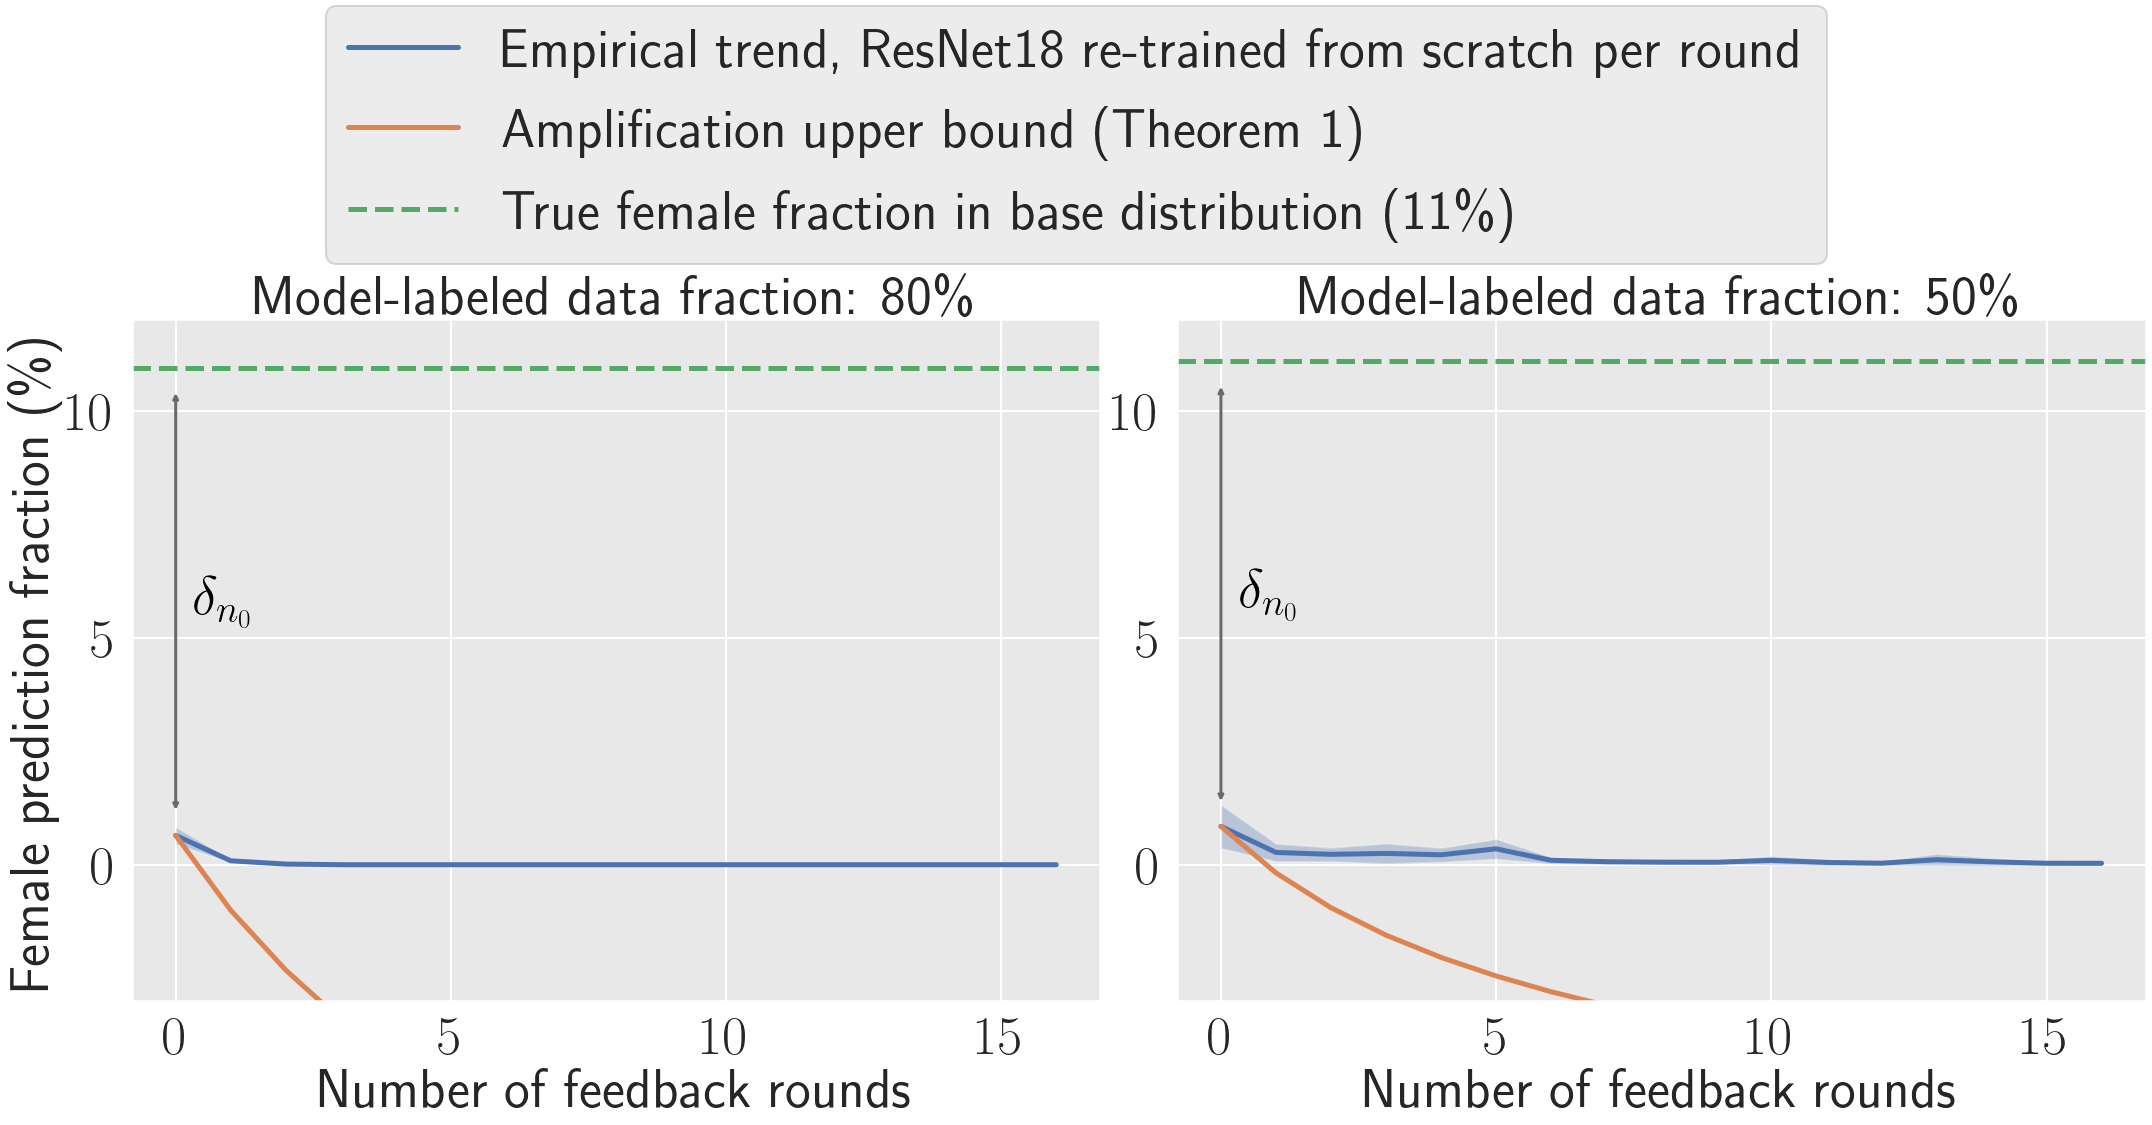

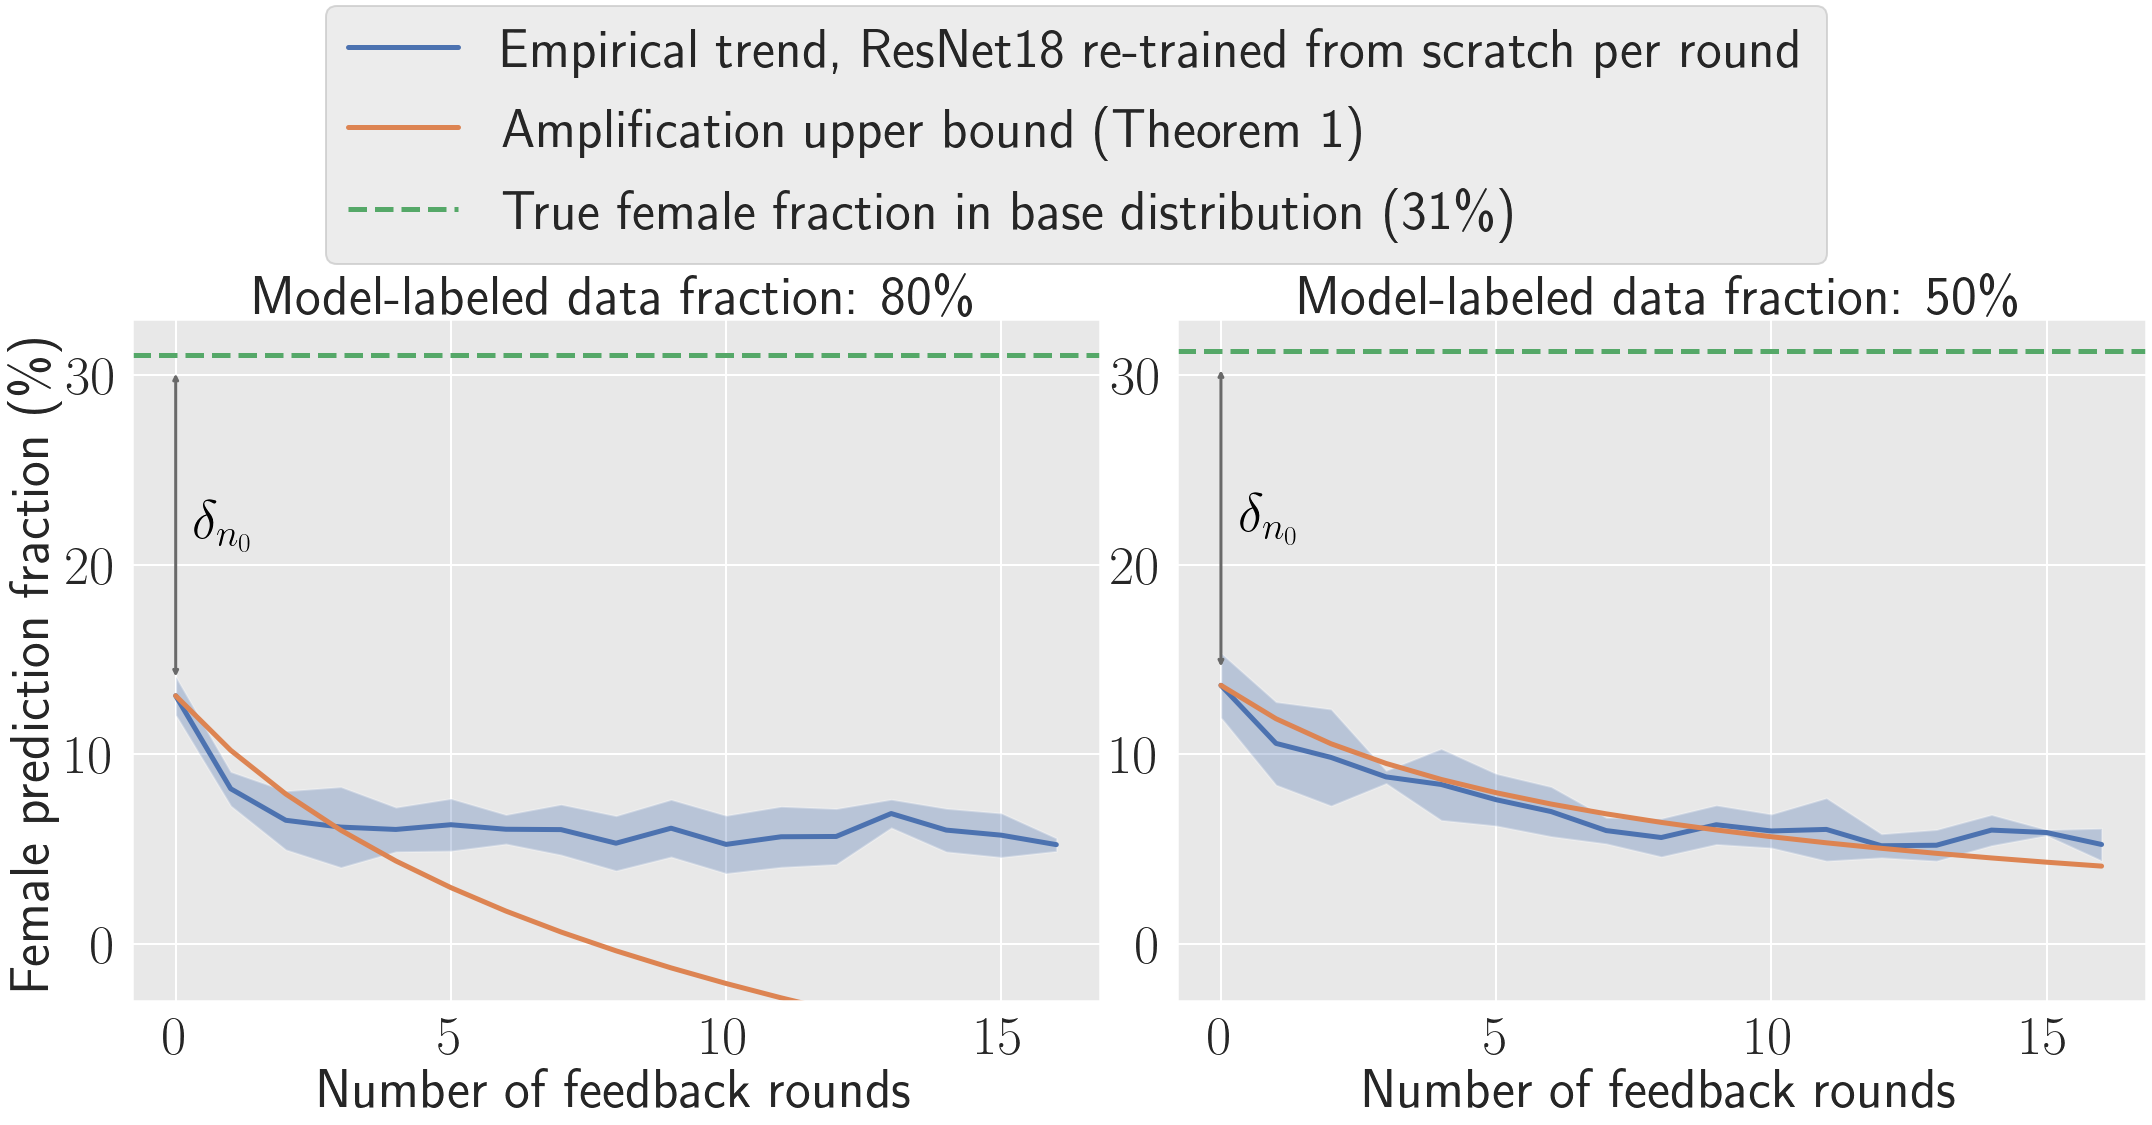

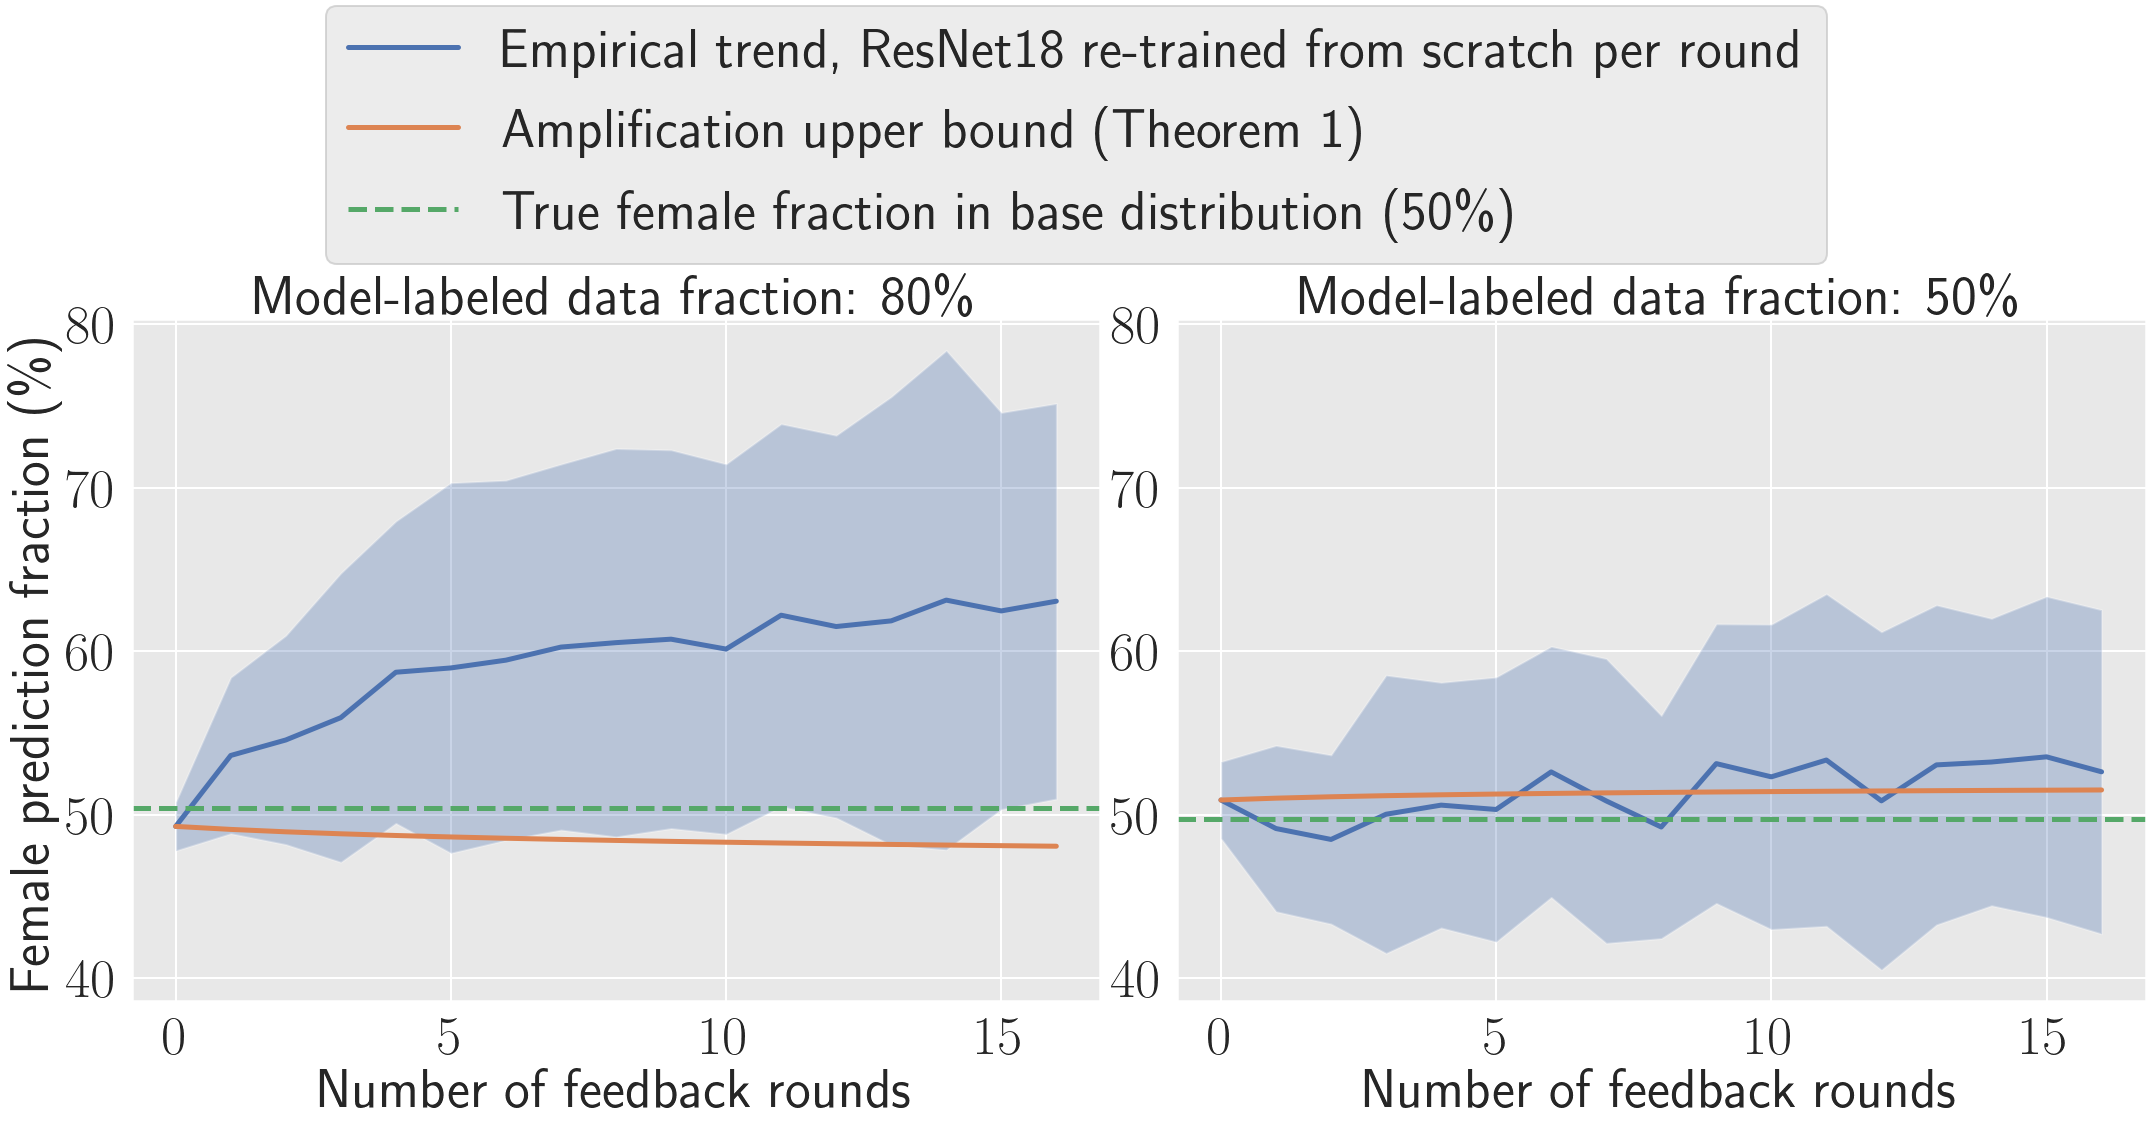

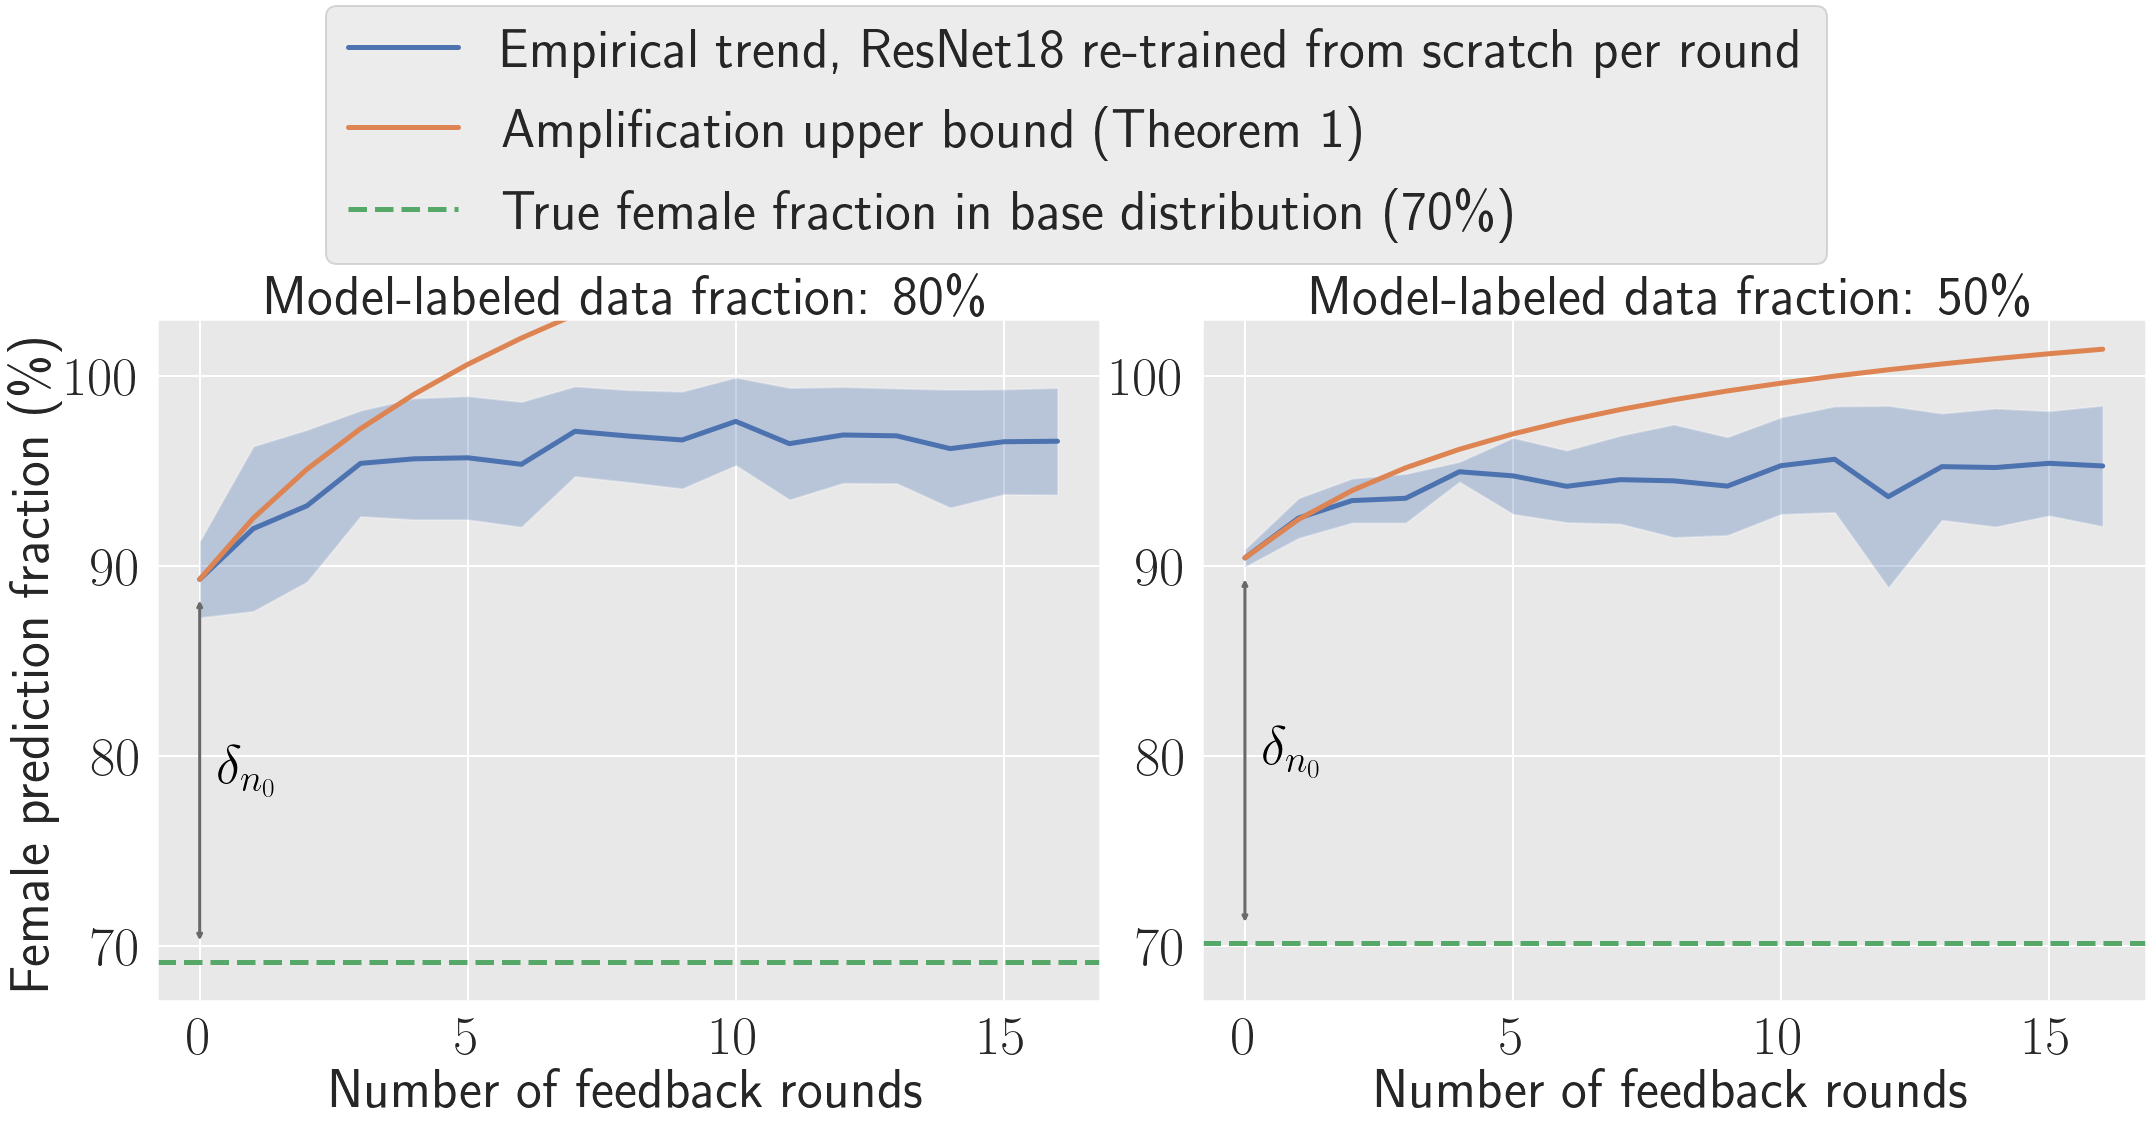

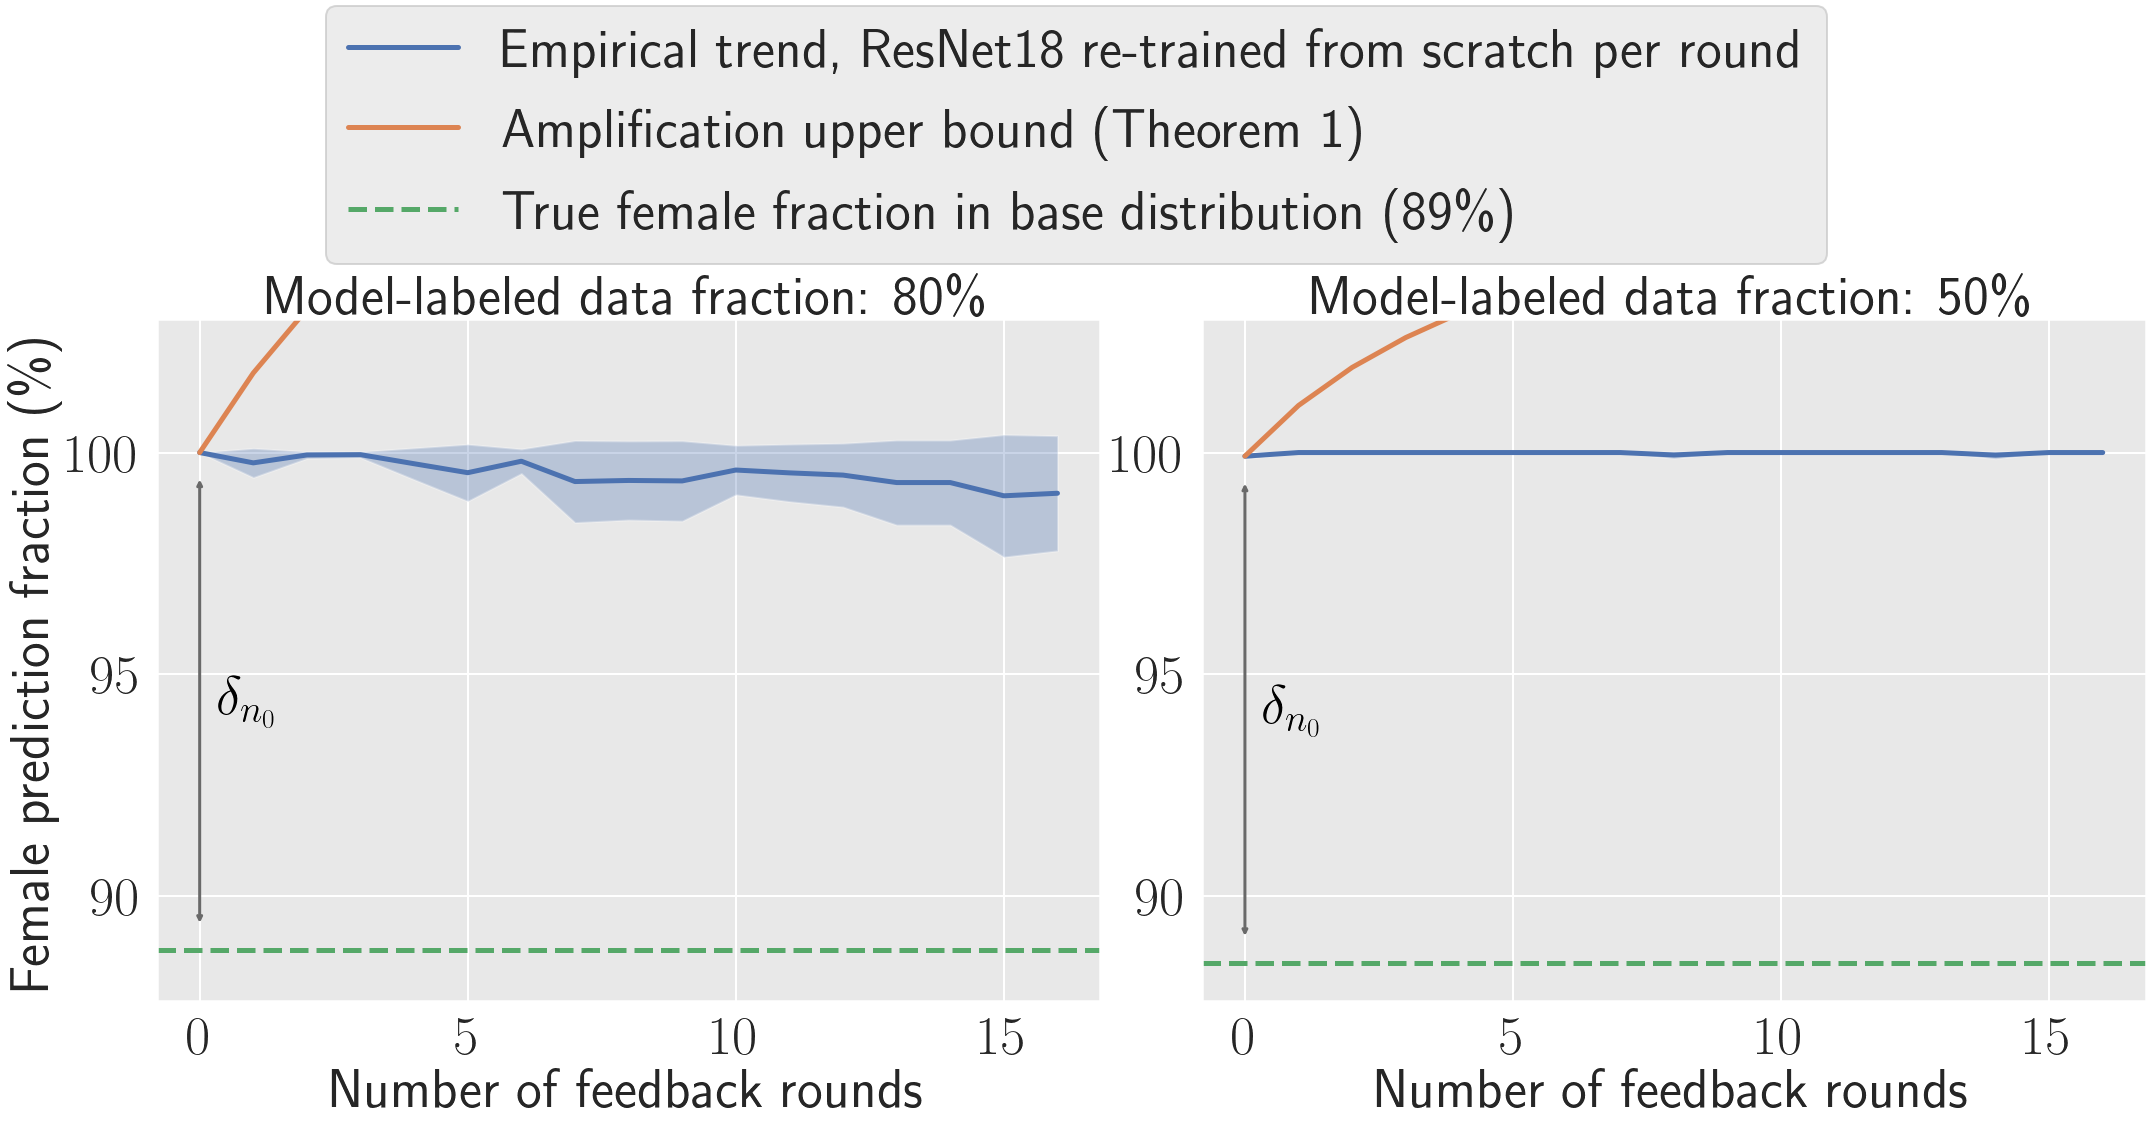

In [49]:
for plot_interval in range(5):
    
    bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, f'preds/interval_{plot_interval}_ratio', 
                                                             lambda run: run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, f'test/interval_{plot_interval}_ratio')
    theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
    
    
    bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, f'preds/interval_{plot_interval}_ratio', 
                                                             lambda run: run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 20000, f'test/interval_{plot_interval}_ratio')
    theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=20000, human_samples_per_round=2500, model_samples_per_round=2500)    
    
    
    true_female_frac = int(np.round(baseline_1/2 + baseline_2/2))
    
    bias_label = 'Empirical trend, ResNet18 re-trained from scratch per round'
    theory_label = 'Amplification upper bound (Theorem 1)'
    baseline_label = f'True female fraction in base distribution ({true_female_frac}\%)'
    xlabel = 'Number of feedback rounds'
    ylabel = 'Female prediction fraction (\%)'
    left_title = 'Model-labeled data fraction: 80\%'
    right_title = 'Model-labeled data fraction: 50\%'
    add_delta = plot_interval != 2
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12), sharey=True, sharex=True)

    plot_lines(ax1, bias_line_1, bias_std_1, theory_line_1, baseline_1, 
               bias_label, theory_label, baseline_label, 
               tick_params=True, xlabel=xlabel, ylabel=ylabel, title=left_title, add_delta=add_delta)

    plot_lines(ax2, bias_line_2, bias_std_2, theory_line_2, baseline_2, 
               bias_label, theory_label, baseline_label, 
               tick_params=True, xlabel=xlabel, title=right_title, add_delta=add_delta)

    ax2.yaxis.set_tick_params(labelbottom=True)

    # set plot cutoffs
    if np.max(theory_line_1) > 100:
        ax1.set_ylim(top=103)
    if np.min(theory_line_1) < 0:
        ax1.set_ylim(bottom=-3)
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 1.15), prop={'size': label_size})
    fig.tight_layout()
    if plot_interval == 0: figname = 'figure_15.pdf'
    if plot_interval == 1: figname = 'figure_8.pdf'
    if plot_interval == 2: figname = 'figure_16.pdf'
    if plot_interval == 3: figname = 'figure_4.pdf'
    if plot_interval == 4: figname = 'figure_17.pdf'
    plt.savefig(figname, facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
    plt.show()

# Figure 5

In [59]:
runs = api.runs(path='data-feedback', filters={'group': 'fig5'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['generated/avg_threshold_toxicity', 'generated/avg_num_quotes'])
    toxicities = np.array([row['generated/avg_threshold_toxicity'] for row in hist])[1:]*100 # discard pretrained model eval
    quotes = np.array([row['generated/avg_num_quotes'] for row in hist])[1:] # discard pretrained model eval
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'toxicities': toxicities, 'quotes': quotes, 'sampling_type': run.config['sampling_type'], 'n0': n0, 'm': m, 'k': k,
                       'test_toxicity': run.summary['test_set/avg_threshold_toxicity']*100, 'test_quotes': run.summary['test_set/avg_num_quotes']})

bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)

bias_line_1v2, bias_std_1v2, baseline_1v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')
theory_line_1v2 = get_theory_line(bias_line_1v2, baseline_1v2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2v2, bias_std_2v2, baseline_2v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')
theory_line_2v2 = get_theory_line(bias_line_2v2, baseline_2v2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:02<00:00, 10.37s/it]


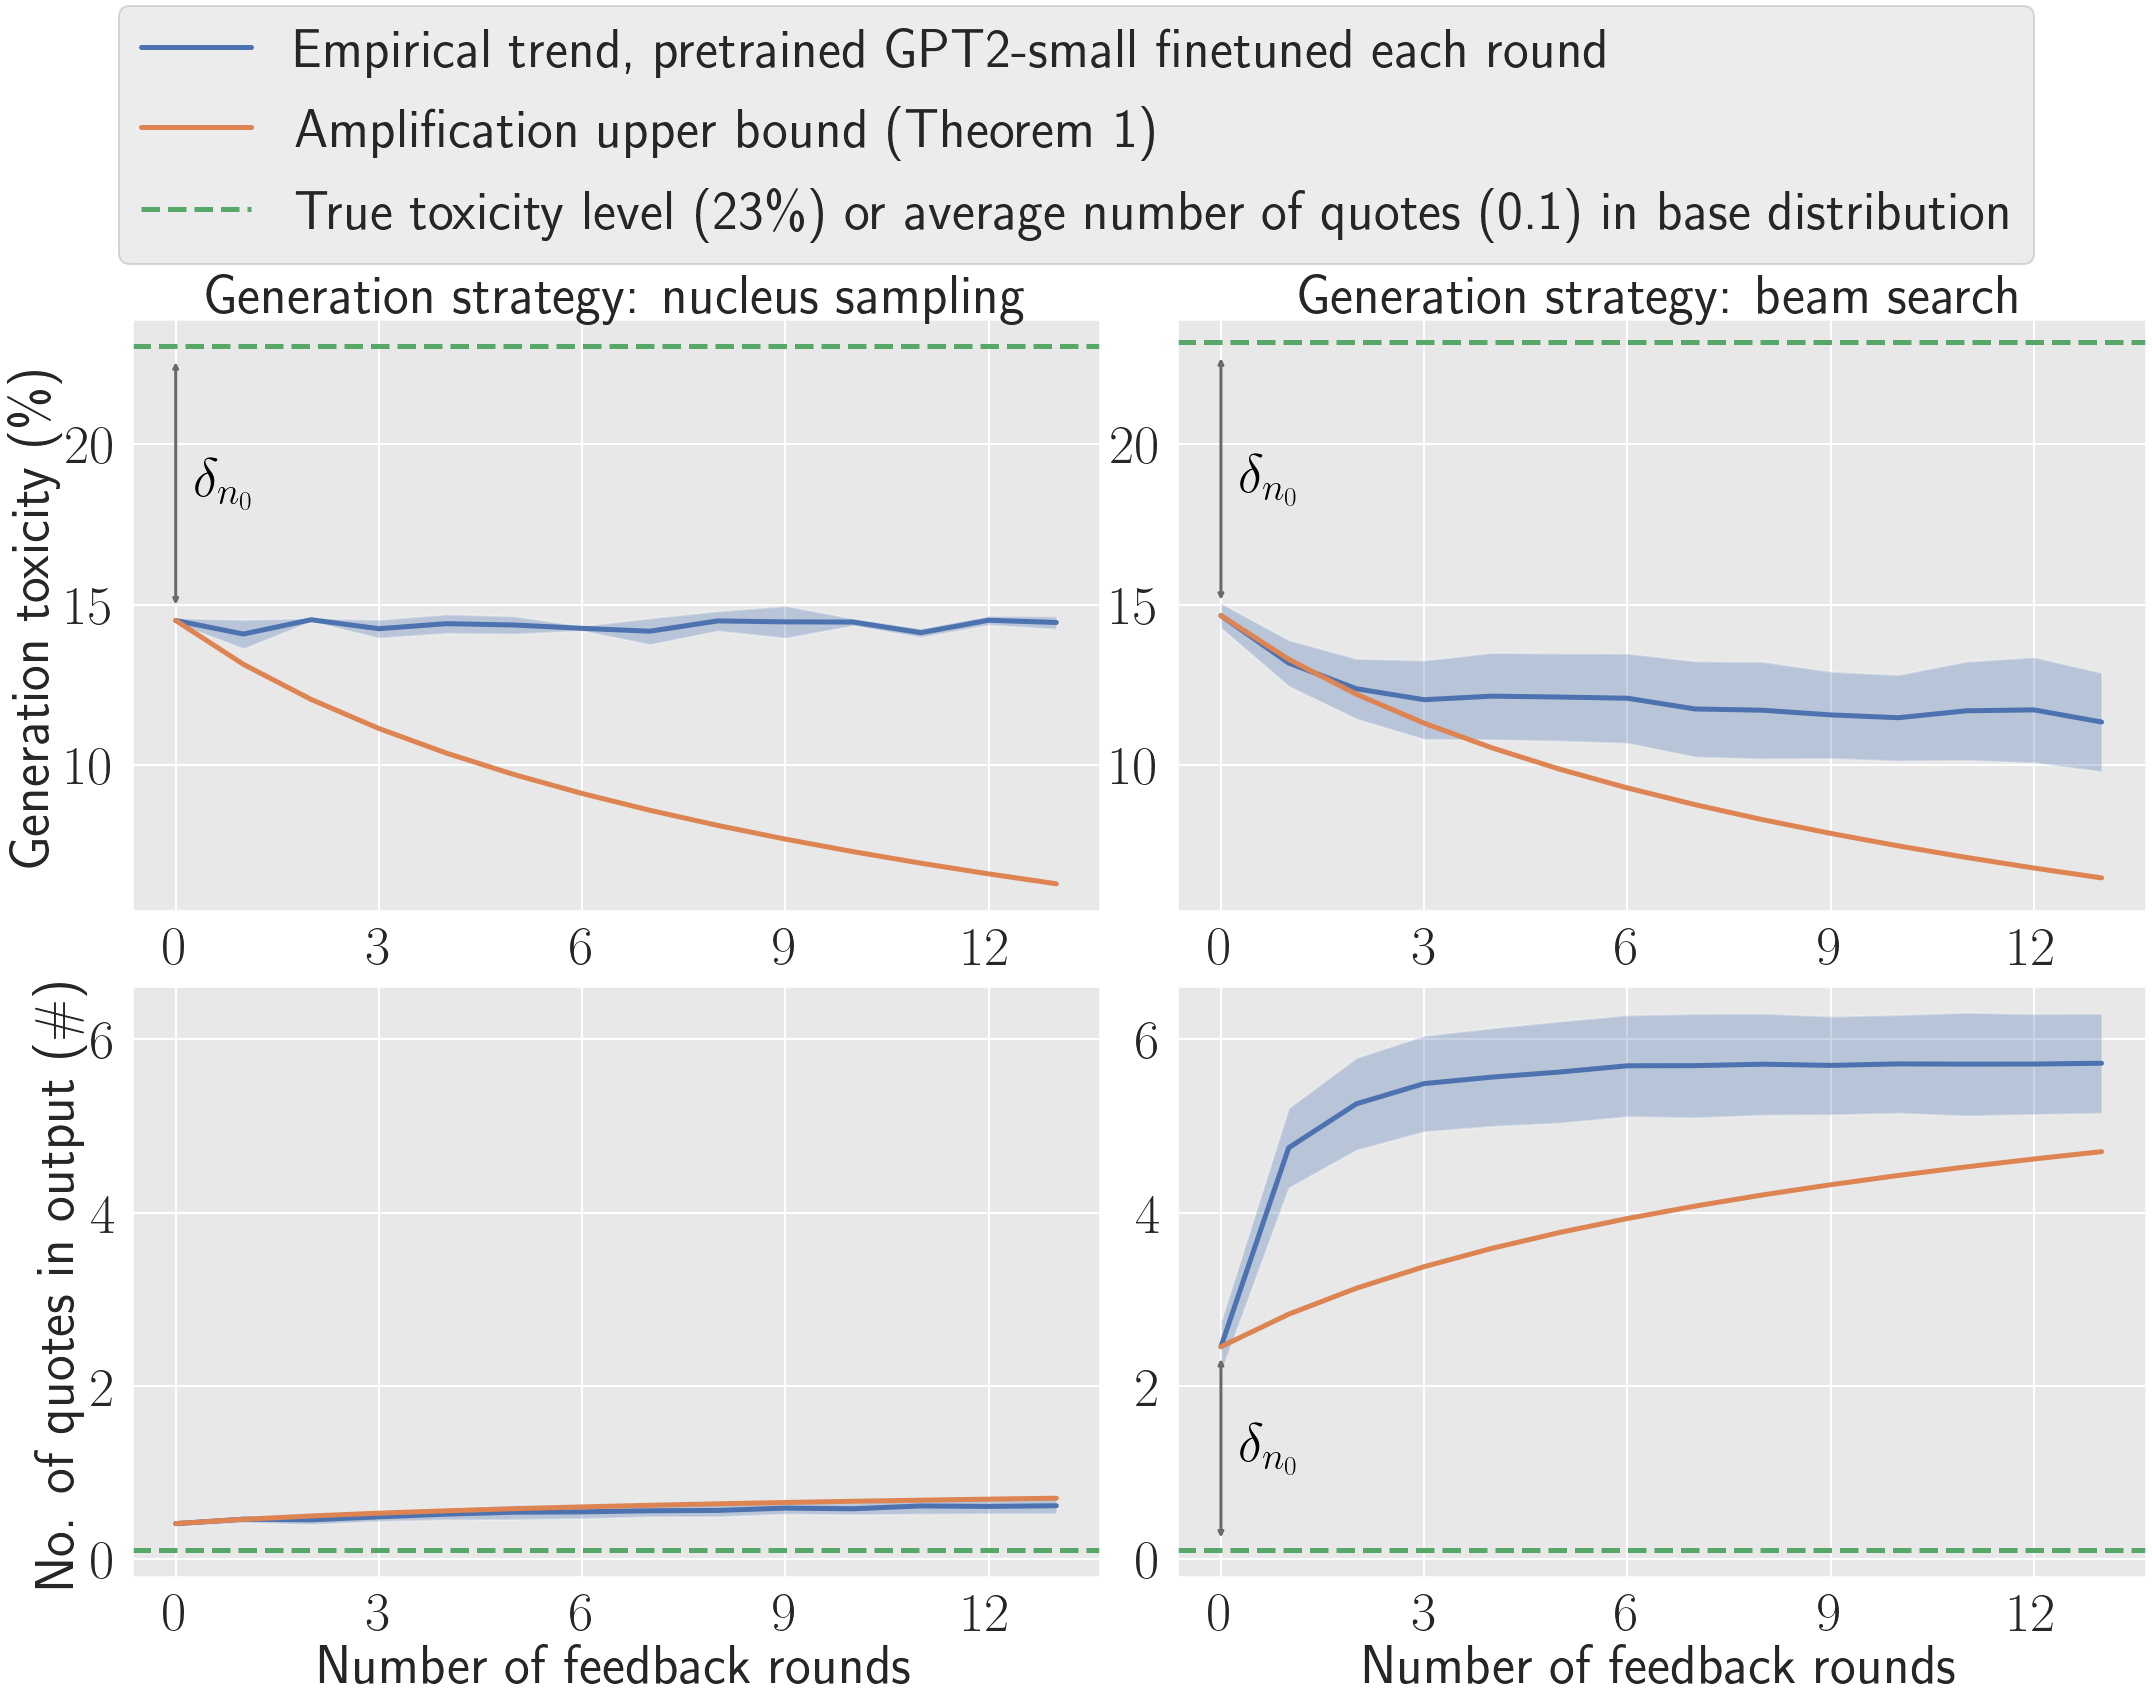

In [60]:
bias_label = 'Empirical trend, pretrained GPT2-small finetuned each round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True toxicity level (23\%) or average number of quotes (0.1) in base distribution'
xlabel = 'Number of feedback rounds'
top_ylabel = 'Generation toxicity (\%)'
bottom_ylabel = 'No. of quotes in output (\#)'
left_title = 'Generation strategy: nucleus sampling'
right_title = 'Generation strategy: beam search'

standard_2x2_plot('figure_5.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2,
                  bias_line_1v2, bias_std_1v2, theory_line_1v2, baseline_1v2, bias_line_2v2, bias_std_2v2, theory_line_2v2, baseline_2v2,
                  bias_label, theory_label, baseline_label, xlabel, top_ylabel, bottom_ylabel, left_title, right_title,
                  custom_xticks=range(0, 13, 3), delt_bl=False)

# Figure 18

In [66]:
runs = api.runs(path='data-feedback', filters={'group': 'fig18'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['generated/avg_threshold_toxicity', 'generated/avg_num_quotes'])
    toxicities = np.array([row['generated/avg_threshold_toxicity'] for row in hist])[1:]*100 # discard pretrained model eval
    quotes = np.array([row['generated/avg_num_quotes'] for row in hist])[1:] # discard pretrained model eval
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'toxicities': toxicities, 'quotes': quotes, 'sampling_type': run.config['sampling_type'], 'n0': n0, 'm': m, 'k': k,
                       'test_toxicity': run.summary['test_set/avg_threshold_toxicity']*100, 'test_quotes': run.summary['test_set/avg_num_quotes']})

bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 20000, 'test_toxicity')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=20000, human_samples_per_round=2500, model_samples_per_round=2500)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 20000, 'test_toxicity')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=20000, human_samples_per_round=2500, model_samples_per_round=2500)

bias_line_1v2, bias_std_1v2, baseline_1v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 20000, 'test_quotes')
theory_line_1v2 = get_theory_line(bias_line_1v2, baseline_1v2, initial_train_set_size=20000, human_samples_per_round=2500, model_samples_per_round=2500)
bias_line_2v2, bias_std_2v2, baseline_2v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 2500 and run['k'] == 2500 and run['n0'] == 20000, 'test_quotes')
theory_line_2v2 = get_theory_line(bias_line_2v2, baseline_2v2, initial_train_set_size=20000, human_samples_per_round=2500, model_samples_per_round=2500)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:04<00:00, 10.81s/it]


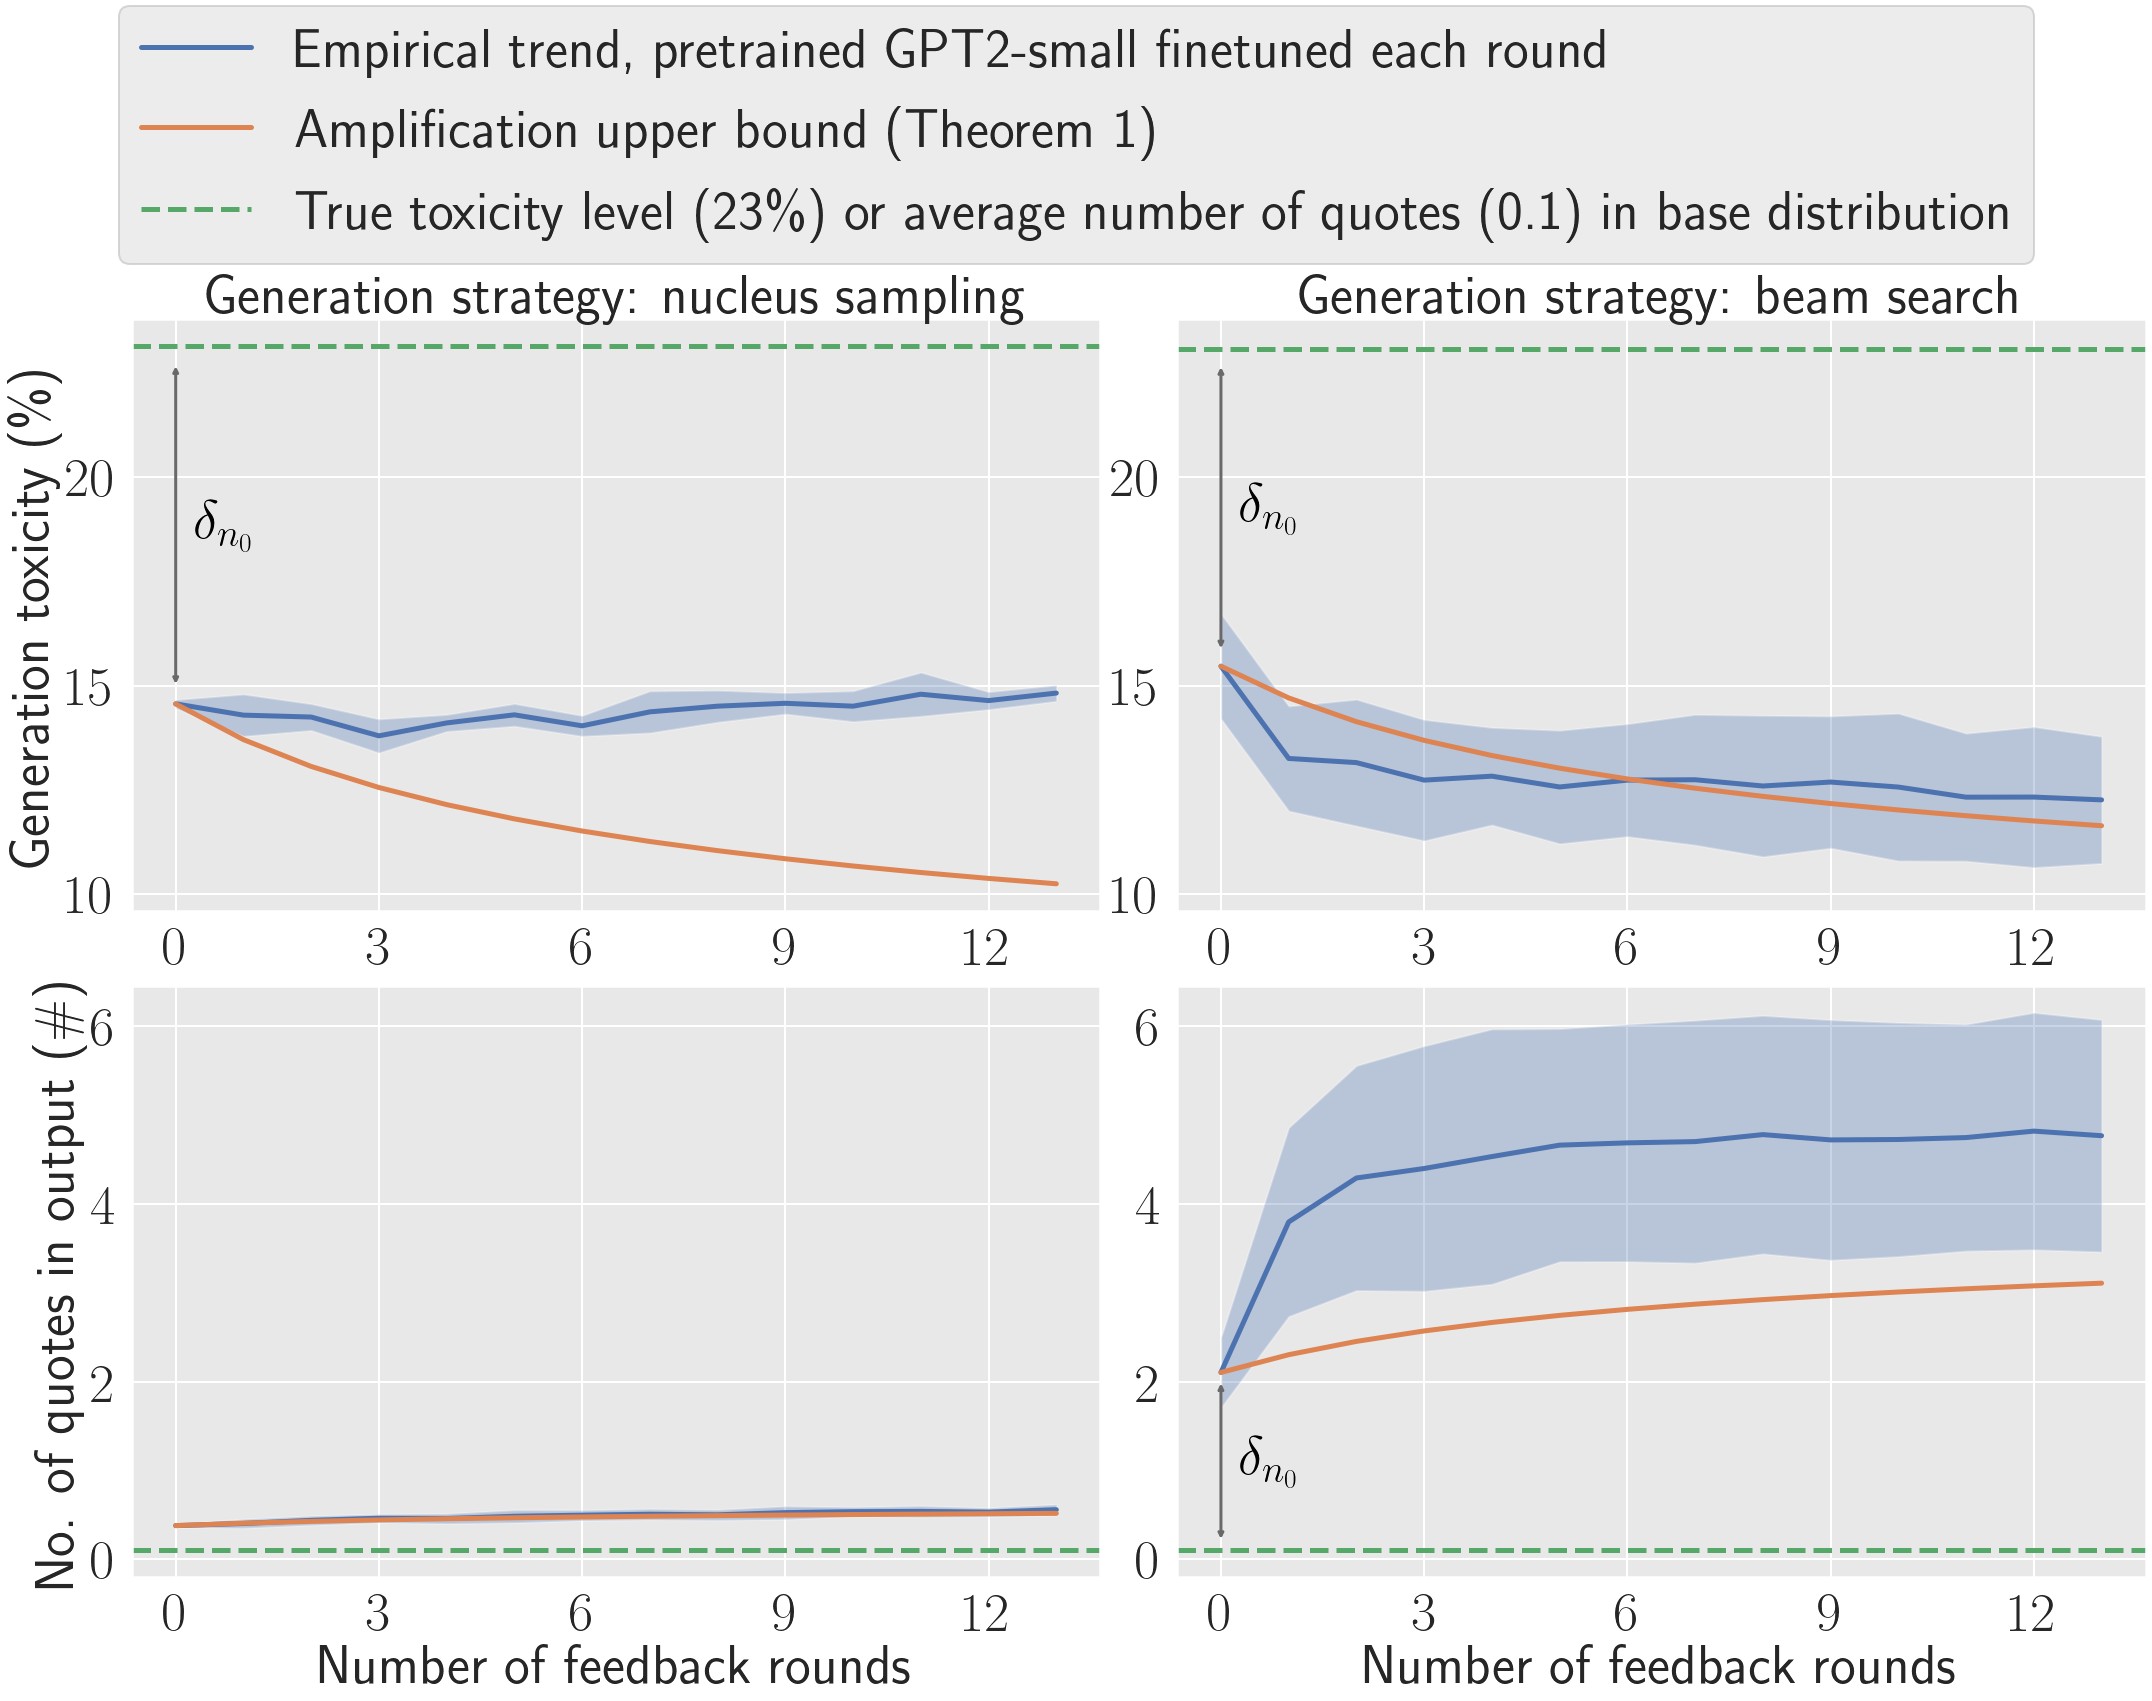

In [67]:
bias_label = 'Empirical trend, pretrained GPT2-small finetuned each round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True toxicity level (23\%) or average number of quotes (0.1) in base distribution'
xlabel = 'Number of feedback rounds'
top_ylabel = 'Generation toxicity (\%)'
bottom_ylabel = 'No. of quotes in output (\#)'
left_title = 'Generation strategy: nucleus sampling'
right_title = 'Generation strategy: beam search'

standard_2x2_plot('figure_18.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2,
                  bias_line_1v2, bias_std_1v2, theory_line_1v2, baseline_1v2, bias_line_2v2, bias_std_2v2, theory_line_2v2, baseline_2v2,
                  bias_label, theory_label, baseline_label, xlabel, top_ylabel, bottom_ylabel, left_title, right_title,
                  custom_xticks=range(0, 13, 3), delt_bl=False)

# Figure 19

In [62]:
runs = api.runs(path='data-feedback', filters={'group': 'fig19'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['generated/avg_threshold_toxicity', 'generated/avg_num_quotes'])
    toxicities = np.array([row['generated/avg_threshold_toxicity'] for row in hist])[1:]*100 # discard pretrained model eval
    quotes = np.array([row['generated/avg_num_quotes'] for row in hist])[1:] # discard pretrained model eval
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'toxicities': toxicities, 'quotes': quotes, 'sampling_type': run.config['sampling_type'], 'n0': n0, 'm': m, 'k': k,
                       'test_toxicity': run.summary['test_set/avg_threshold_toxicity']*100, 'test_quotes': run.summary['test_set/avg_num_quotes']})

bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)

bias_line_1v2, bias_std_1v2, baseline_1v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')
theory_line_1v2 = get_theory_line(bias_line_1v2, baseline_1v2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2v2, bias_std_2v2, baseline_2v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')
theory_line_2v2 = get_theory_line(bias_line_2v2, baseline_2v2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:09<00:00, 11.65s/it]


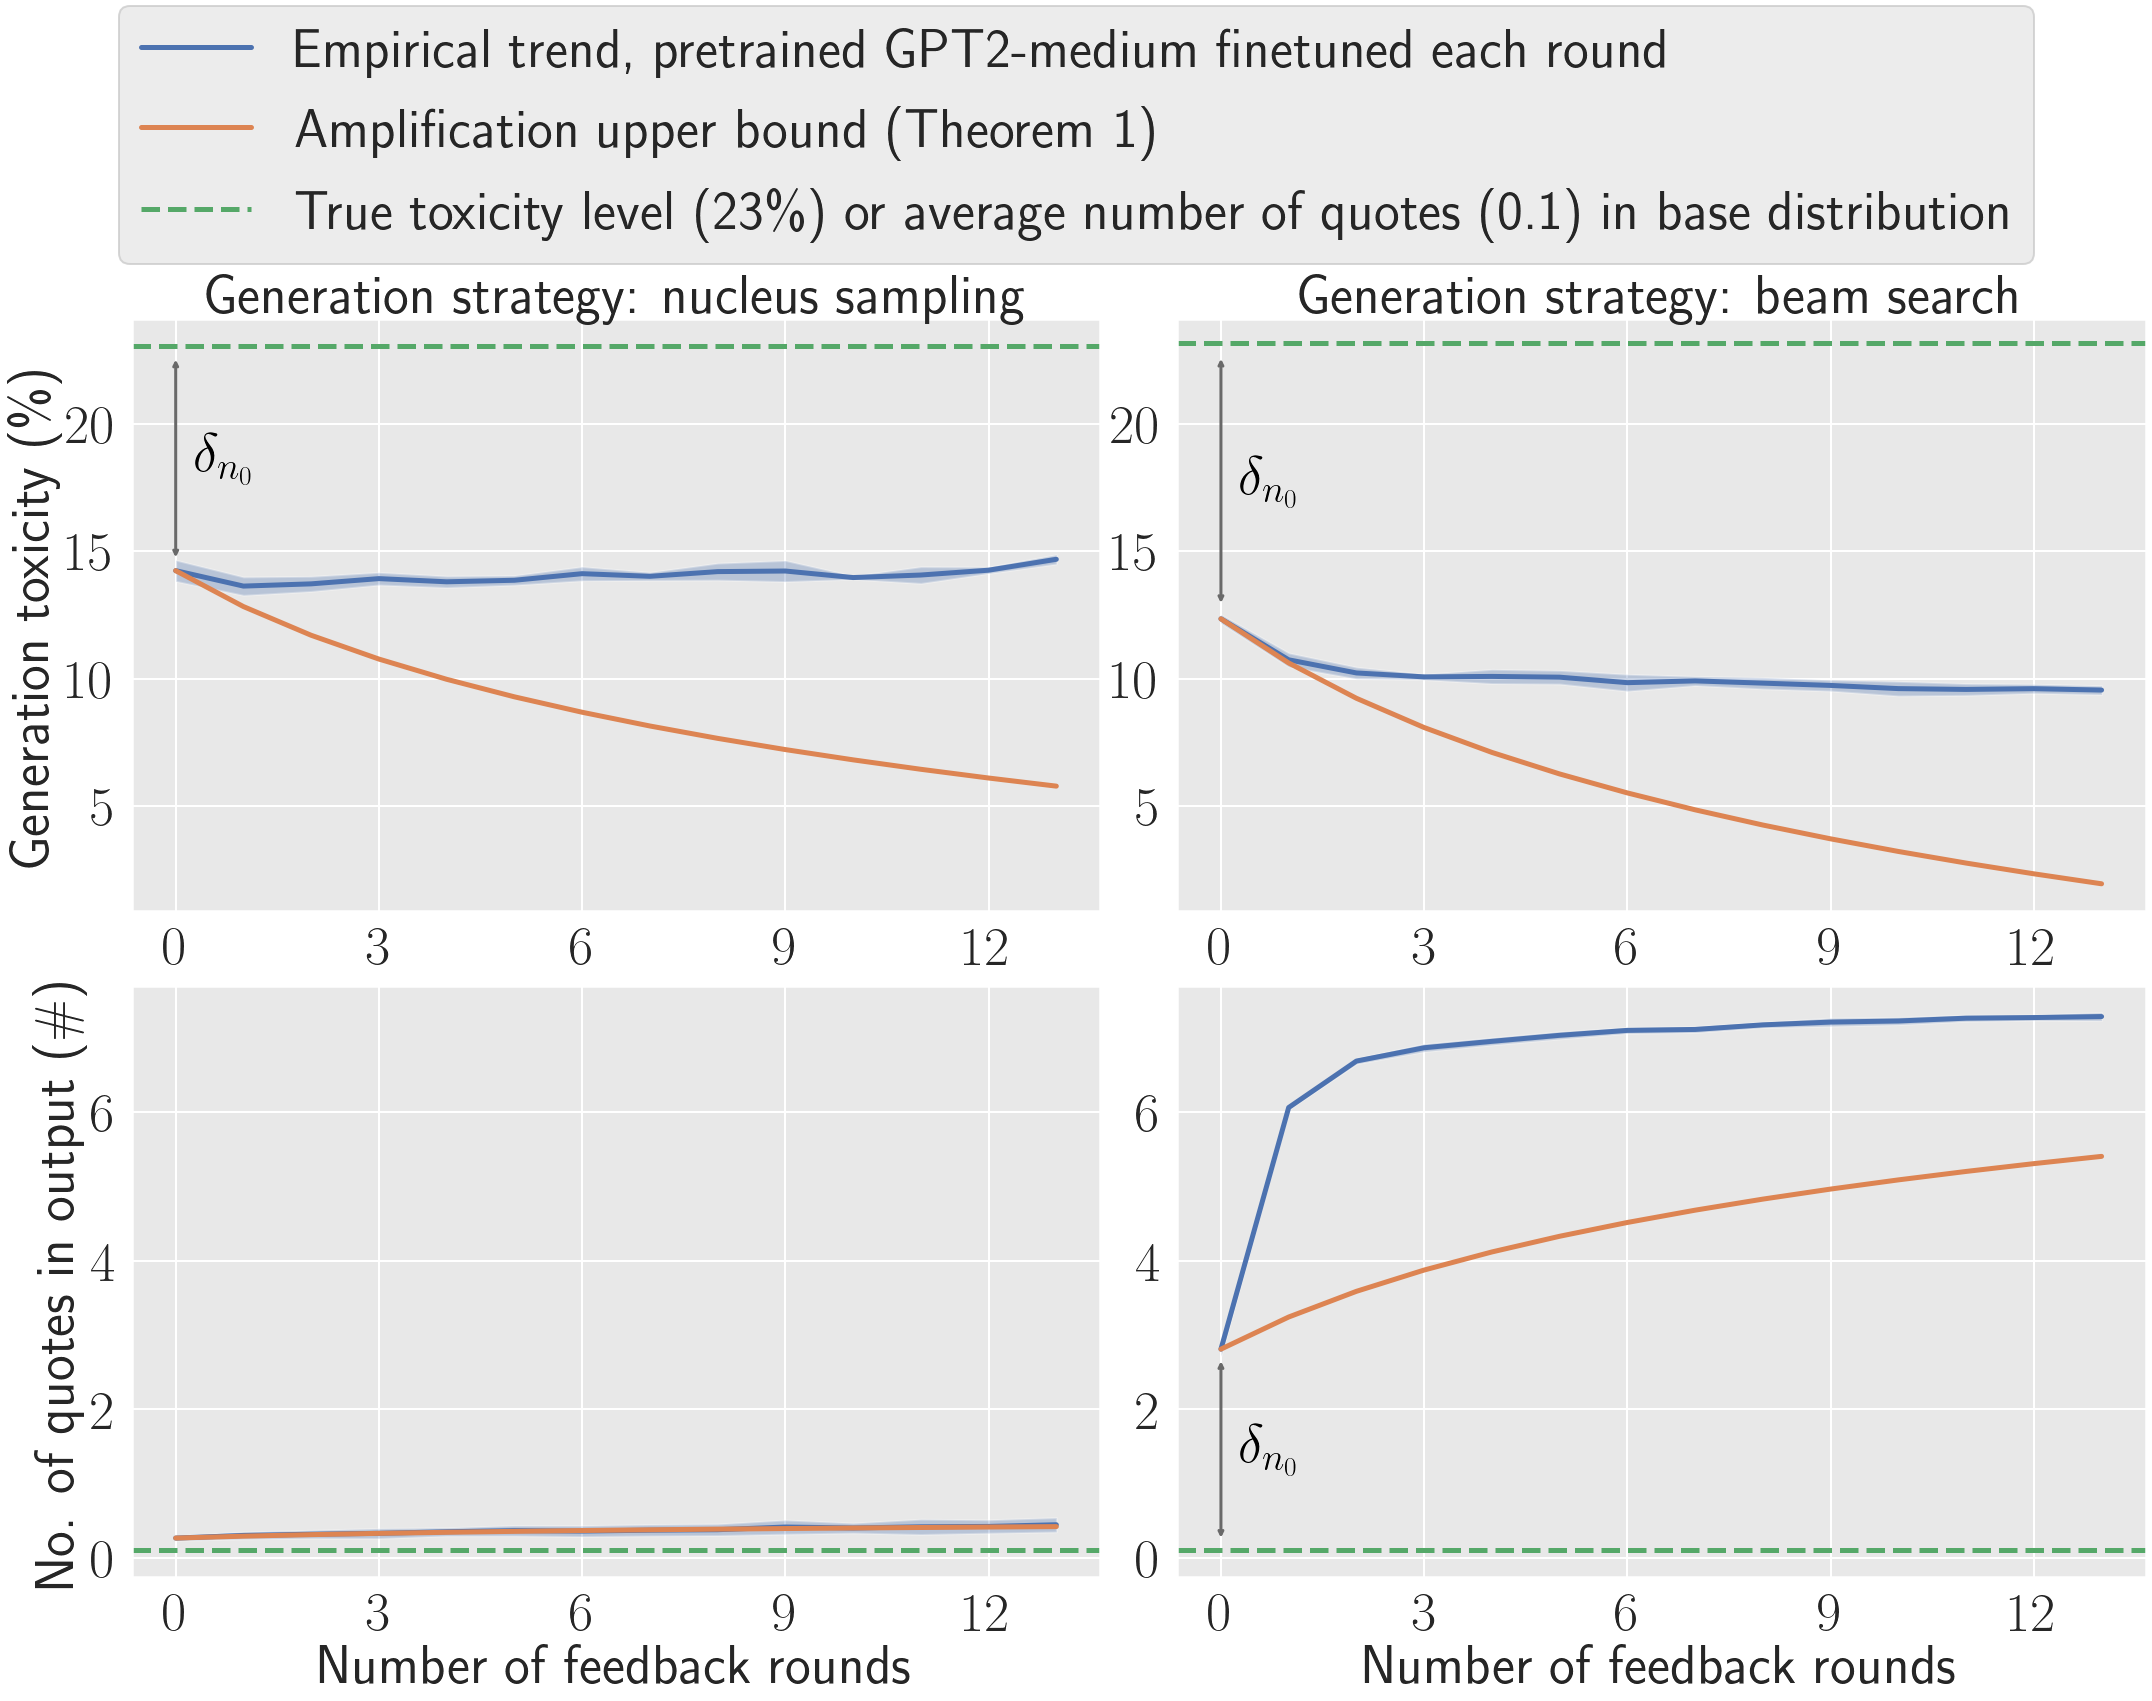

In [63]:
bias_label = 'Empirical trend, pretrained GPT2-medium finetuned each round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True toxicity level (23\%) or average number of quotes (0.1) in base distribution'
xlabel = 'Number of feedback rounds'
top_ylabel = 'Generation toxicity (\%)'
bottom_ylabel = 'No. of quotes in output (\#)'
left_title = 'Generation strategy: nucleus sampling'
right_title = 'Generation strategy: beam search'

standard_2x2_plot('figure_19.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2,
                  bias_line_1v2, bias_std_1v2, theory_line_1v2, baseline_1v2, bias_line_2v2, bias_std_2v2, theory_line_2v2, baseline_2v2,
                  bias_label, theory_label, baseline_label, xlabel, top_ylabel, bottom_ylabel, left_title, right_title,
                  custom_xticks=range(0, 13, 3), delt_bl=False)

# Figure 20

In [64]:
runs = api.runs(path='data-feedback', filters={'group': 'fig20'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['generated/avg_threshold_toxicity', 'generated/avg_num_quotes'])
    toxicities = np.array([row['generated/avg_threshold_toxicity'] for row in hist])[1:]*100 # discard pretrained model eval
    quotes = np.array([row['generated/avg_num_quotes'] for row in hist])[1:] # discard pretrained model eval
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'toxicities': toxicities, 'quotes': quotes, 'sampling_type': run.config['sampling_type'], 'n0': n0, 'm': m, 'k': k,
                       'test_toxicity': run.summary['test_set/avg_threshold_toxicity']*100, 'test_quotes': run.summary['test_set/avg_num_quotes']})

bias_line_1, bias_std_1, baseline_1 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
theory_line_1 = get_theory_line(bias_line_1, baseline_1, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2, bias_std_2, baseline_2 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
theory_line_2 = get_theory_line(bias_line_2, baseline_2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)

bias_line_1v2, bias_std_1v2, baseline_1v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')
theory_line_1v2 = get_theory_line(bias_line_1v2, baseline_1v2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)
bias_line_2v2, bias_std_2v2, baseline_2v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')
theory_line_2v2 = get_theory_line(bias_line_2v2, baseline_2v2, initial_train_set_size=20000, human_samples_per_round=1000, model_samples_per_round=4000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:12<00:00, 12.02s/it]


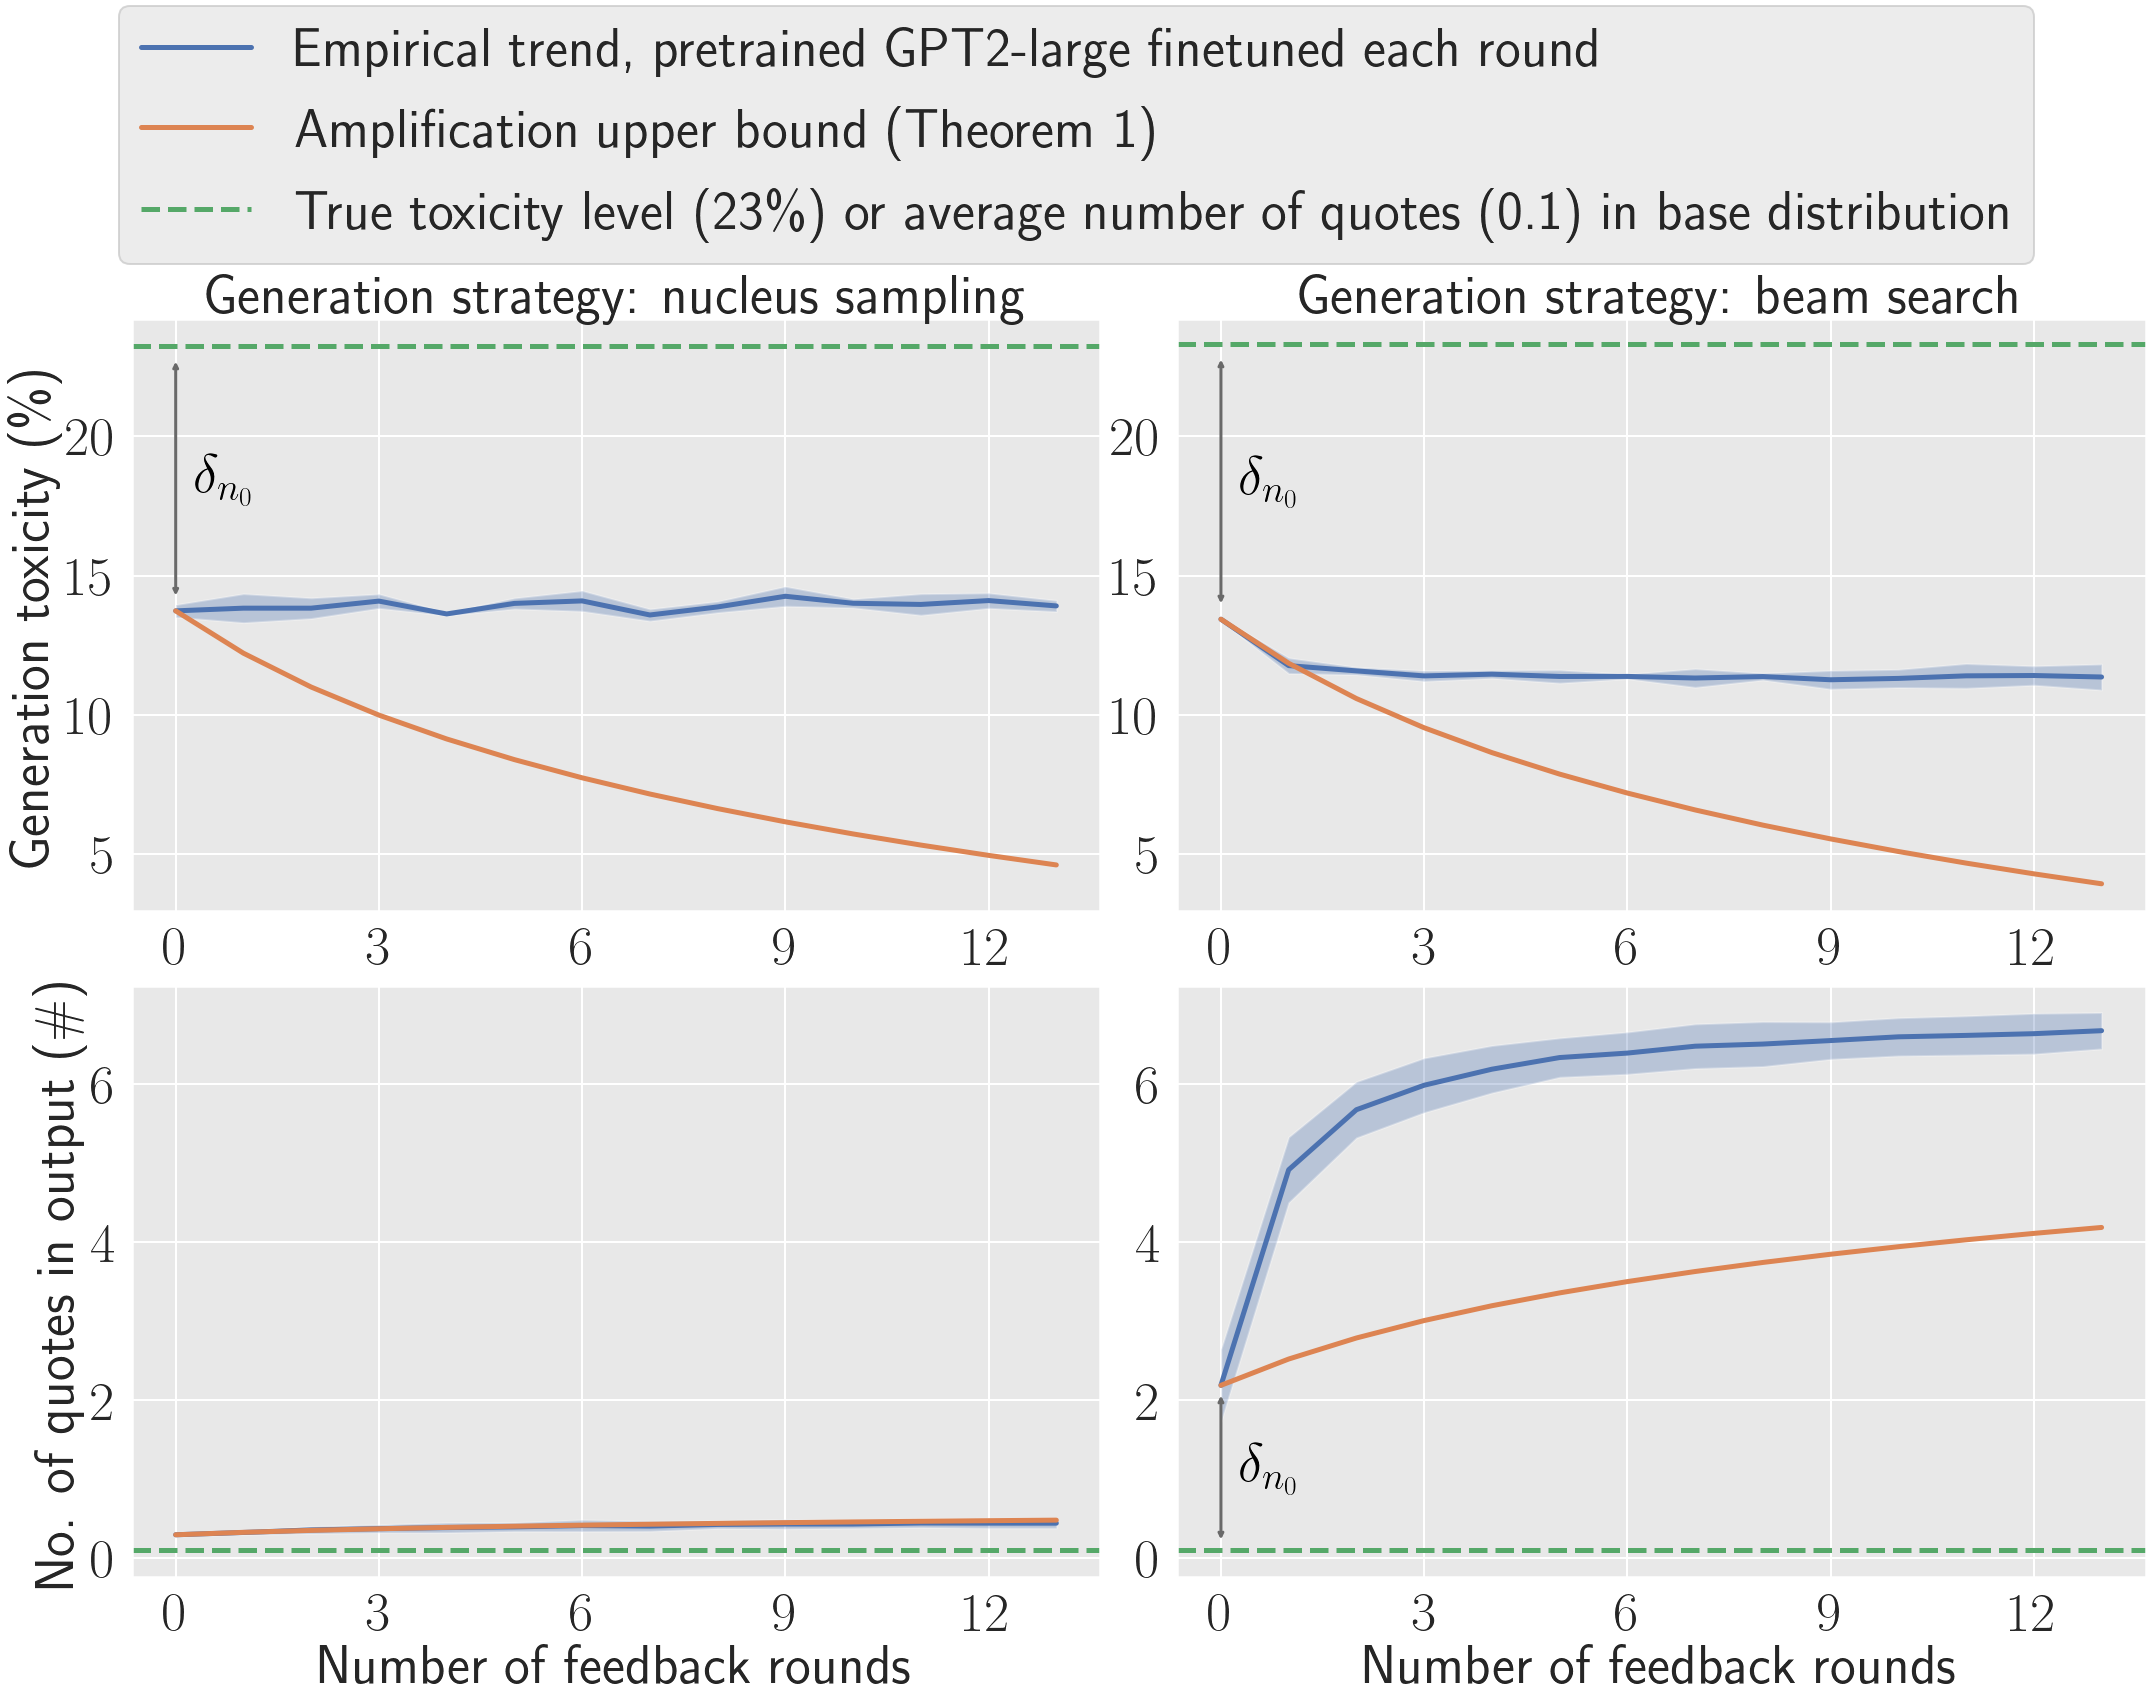

In [65]:
bias_label = 'Empirical trend, pretrained GPT2-large finetuned each round'
theory_label = 'Amplification upper bound (Theorem 1)'
baseline_label = 'True toxicity level (23\%) or average number of quotes (0.1) in base distribution'
xlabel = 'Number of feedback rounds'
top_ylabel = 'Generation toxicity (\%)'
bottom_ylabel = 'No. of quotes in output (\#)'
left_title = 'Generation strategy: nucleus sampling'
right_title = 'Generation strategy: beam search'

standard_2x2_plot('figure_20.pdf', bias_line_1, bias_std_1, theory_line_1, baseline_1, bias_line_2, bias_std_2, theory_line_2, baseline_2,
                  bias_line_1v2, bias_std_1v2, theory_line_1v2, baseline_1v2, bias_line_2v2, bias_std_2v2, theory_line_2v2, baseline_2v2,
                  bias_label, theory_label, baseline_label, xlabel, top_ylabel, bottom_ylabel, left_title, right_title,
                  custom_xticks=range(0, 13, 3), delt_bl=False)

# Figure 6

In [69]:
runs = api.runs(path='data-feedback', filters={'group': 'fig5'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['generated/avg_threshold_toxicity', 'generated/avg_num_quotes'])
    toxicities = np.array([row['generated/avg_threshold_toxicity'] for row in hist])[1:]*100 # discard pretrained model eval
    quotes = np.array([row['generated/avg_num_quotes'] for row in hist])[1:] # discard pretrained model eval
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'toxicities': toxicities, 'quotes': quotes, 'sampling_type': run.config['sampling_type'], 'n0': n0, 'm': m, 'k': k,
                       'test_toxicity': run.summary['test_set/avg_threshold_toxicity']*100, 'test_quotes': run.summary['test_set/avg_num_quotes']})

bias_line_1v1, bias_std_1v1, baseline_1v1 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
bias_line_1v2, bias_std_1v2, baseline_1v2 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
bias_line_2v1, bias_std_2v1, baseline_2v1 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'nucleus_sampling' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')
bias_line_2v2, bias_std_2v2, baseline_2v2 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')

runs = api.runs(path='data-feedback', filters={'group': 'fig6'})
runs_stats = []
for run in tqdm(runs):
    hist = run.scan_history(keys=['generated/avg_threshold_toxicity', 'generated/avg_num_quotes'])
    toxicities = np.array([row['generated/avg_threshold_toxicity'] for row in hist])[1:]*100 # discard pretrained model eval
    quotes = np.array([row['generated/avg_num_quotes'] for row in hist])[1:] # discard pretrained model eval
    n0 = run.config['init_train_set_size']
    m = run.config['num_human_labeled_samples']
    k = run.config['num_model_labeled_samples']
    runs_stats.append({'toxicities': toxicities, 'quotes': quotes, 'sampling_type': run.config['sampling_type'], 'n0': n0, 'm': m, 'k': k,
                       'test_toxicity': run.summary['test_set/avg_threshold_toxicity']*100, 'test_quotes': run.summary['test_set/avg_num_quotes']})

bias_line_1v3, bias_std_1v3, baseline_1v3 = get_bias_std_lines(runs_stats, 'toxicities', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_toxicity')
bias_line_2v3, bias_std_2v3, baseline_2v3 = get_bias_std_lines(runs_stats, 'quotes', lambda run: run['sampling_type'] == 'beam_search' and run['m'] == 1000 and run['k'] == 4000 and run['n0'] == 20000, 'test_quotes')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:39<00:00, 53.10s/it]


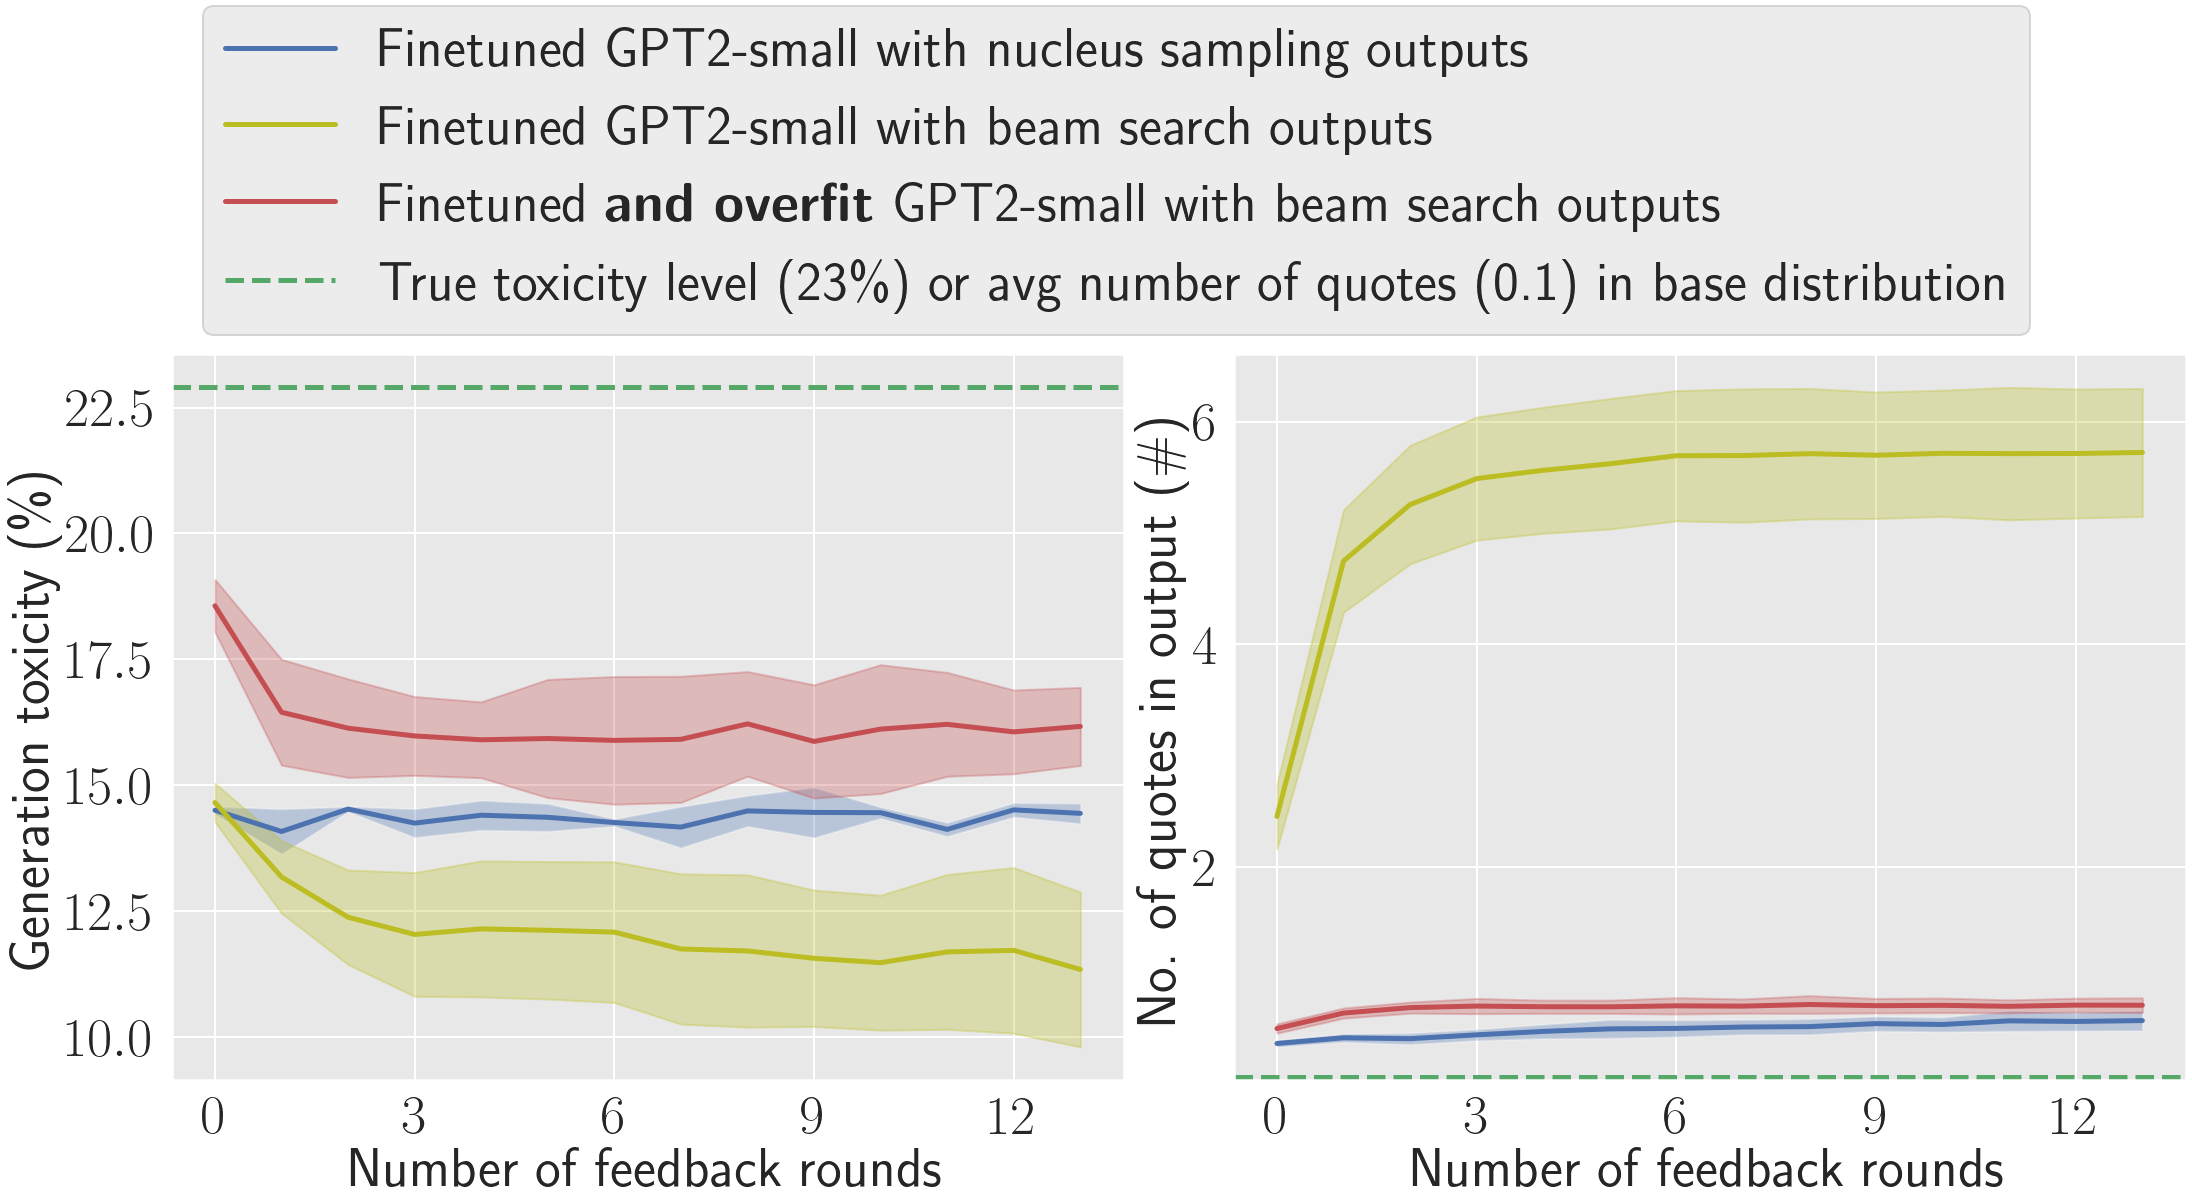

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12), sharex=True)

baseline_1 = (baseline_1v1 + baseline_1v2 + baseline_1v3) / 3
baseline_2 = (baseline_2v1 + baseline_2v2 + baseline_2v3) / 3

ax1.plot(bias_line_1v1, label='Finetuned GPT2-small with nucleus sampling outputs', linewidth=5)
ax1.fill_between(range(len(bias_std_1v1)), bias_line_1v1-bias_std_1v1, bias_line_1v1+bias_std_1v1, alpha=0.3)
ax1.plot(bias_line_1v2, label='Finetuned GPT2-small with beam search outputs', linewidth=5, color='tab:olive')
ax1.fill_between(range(len(bias_std_1v2)), bias_line_1v2-bias_std_1v2, bias_line_1v2+bias_std_1v2, alpha=0.3, color='tab:olive')
ax1.plot(bias_line_1v3, label=r'Finetuned \textbf{and overfit} GPT2-small with beam search outputs', linewidth=5, color='r')
ax1.fill_between(range(len(bias_std_1v3)), bias_line_1v3-bias_std_1v3, bias_line_1v3+bias_std_1v3, alpha=0.3, color='r')
ax1.axhline(y=baseline_1, c='g', linestyle='--', label='True toxicity level (23\%) or avg number of quotes (0.1) in base distribution', linewidth=5)

ax2.plot(bias_line_2v1, label='Finetuned GPT2-small with nucleus sampling outputs', linewidth=5)
ax2.fill_between(range(len(bias_std_2v1)), bias_line_2v1-bias_std_2v1, bias_line_2v1+bias_std_2v1, alpha=0.3)
ax2.plot(bias_line_2v2, label='Finetuned GPT2-small with beam search outputs', linewidth=5, color='tab:olive')
ax2.fill_between(range(len(bias_std_2v2)), bias_line_2v2-bias_std_2v2, bias_line_2v2+bias_std_2v2, alpha=0.3, color='tab:olive')
ax2.plot(bias_line_2v3, label='Finetuned \textbf{and overfit} GPT2-small with beam search outputs', linewidth=5, color='r')
ax2.fill_between(range(len(bias_std_2v3)), bias_line_2v3-bias_std_2v3, bias_line_2v3+bias_std_2v3, alpha=0.3, color='r')
ax2.axhline(y=baseline_2, c='g', linestyle='--', label='True toxicity level (23\%) or avg number of quotes (0.1) in base distribution', linewidth=5)

ax1.set_xlabel('Number of feedback rounds', fontsize=label_size)
ax1.set_ylabel('Generation toxicity (\%)', fontsize=label_size)
ax1.tick_params(axis='both', which='major', labelsize=label_size)
ax1.set_xticks(range(0, 13, 3))
ax2.set_xlabel('Number of feedback rounds', fontsize=label_size)
ax2.set_ylabel('No. of quotes in output (\#)', fontsize=label_size)
ax2.tick_params(axis='both', which='major', labelsize=label_size)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 1.2), prop={'size': label_size})
fig.tight_layout()
plt.savefig('figure_6.pdf', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')
plt.show()